In [1]:
library(data.table)
library(readxl)
library(Matrix)
library(stringr)
library(tidyverse)
library(cowplot)
library(ggnewscale)
library(ggrepel)

Warning message:
“package ‘data.table’ was built under R version 4.4.1”
── Attaching core tidyverse packages ───────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ─────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ tidyr::expand()      masks Matrix::expand()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ tidyr::pack()        masks Matrix::pack()
✖

In [2]:
meta_colors_epi <- c("Immature Goblet"="#7D86Ba", "Goblet"="#BC79AC", 
                 "TA 1"="#4A69A5",  "TA 2"="#629F3F", 
                 "Cycling TA"="#6A2A81",  "Secretory TA"="#CA7953",
                 "Immature Enterocytes 1"="#C46A1F", "Immature Enterocytes 2"="#D2D05D", 
                 "Enteroendocrine"="#272727", "Enterocyte Progenitors"="#7f4521", 
                 "Best4+ Enterocytes"="#79B193", "Enterocytes"="#A7C6E6", 
                 "Stem"="#B01C20","Tuft"="#9DBF4A", 
                 "M cells"="#878787")
meta_colors_epi_clean <- c("Immature Goblet"="#7D86Ba", "Goblet"="#BC79AC", 
                 "Cycling TA"="#6A2A81",  "Secretory TA"="#CA7953",
                 "Immature Enterocytes 1"="#C46A1F", "Immature Enterocytes 2"="#D2D05D", 
                 "Enteroendocrine"="#272727", "Enterocyte Progenitors"="#7f4521", 
                 "Best4+ Enterocytes"="#79B193", "Enterocytes"="#A7C6E6", 
                 "Stem"="#B01C20","Tuft"="#9DBF4A", 
                 "M cells"="#878787")
meta_colors_fib <- c('WNT2B+ Fos-lo 1'='#4b67a3', 'WNT2B+ Fos-lo 2'='#66a141', 
                   'WNT2B+ Fos-hi'='#ae1e24', 
                   'WNT5B+ 1'='#c7661c', 'WNT5B+ 2'='#d2d35b', 
                   'Myofibroblasts'='#a5c3e2', 'RSPO3+'='#6f3b85', 
                   'Inflammatory Fibroblasts'='#7d492a')
meta_colors_b <- c("Plasma" = "#A6CEE3", "Cycling B" = "#B2DF8A", 
                   "Follicular" = "#FF7F00", "GC" = "#1F78B4")

meta_colors_t <- c("MT-hi" = "#A6CEE3", "Cycling T" = "#1F78B4", 
                 "NKs" = "#B2DF8A", "ILCs" = "#33A02C", 
                 "CD8+ IELs" = "#FB9A99", "CD8+ LP" = "#E31A1C", 
                 "CD8+ IL17+" = "#FDBF6F", 
                 "CD4+ Activated Fos-hi" = "#CAB2D6", "CD4+ Activated Fos-lo" = "#6A3D9A", 
                 "CD4+ Memory" = "#FFFF99", "CD4+ PD1+" = "#B15928", 
                 "Tregs" = "#B3E2CD")

meta_colors_my <- c("Macrophages" = "#A6CEE3", "DC1" = "#1F78B4", 
                 "DC2" = "#B2DF8A", "CD69+ Mast" = "#33A02C", 
                 "CD69- Mast" = "#FB9A99", "Cycling Monocytes" = "#E31A1C", 
                 "Inflammatory Monocytes" = "#FDBF6F")

meta_colors_end <- c("Endothelial" = "#868686", 
                     "Microvascular" = "#78b392",
                     "Post-capillary Venules" = "#c97b51", 
                     "Pericytes" = "#7f87bc")
meta_colors_glia <- c("Glia"="#ba79a9")

meta_colors_my_clean <- c("DC1" = "#1F78B4", 
                 "DC2" = "#B2DF8A", "CD69+ Mast" = "#33A02C", 
                 "CD69- Mast" = "#FB9A99", "Cycling Monocytes" = "#E31A1C", 
                 "Inflammatory Monocytes" = "#FDBF6F")


meta_colors_glia <- c("Glia"="#ba79a9")
meta_colors <- c(meta_colors_epi, meta_colors_fib, meta_colors_end, meta_colors_glia, 
                 meta_colors_b, meta_colors_t, meta_colors_my)
meta_colors_clean <- c(meta_colors_epi_clean, meta_colors_fib, 
                 meta_colors_b, meta_colors_t, meta_colors_my_clean)

meta_colors <- c(meta_colors_epi, meta_colors_fib, meta_colors_end, meta_colors_glia, 
                 meta_colors_b, meta_colors_t, meta_colors_my)


In [3]:
meta_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)
meta_colors1_clean <- list(meta_colors_epi_clean, meta_colors_fib, 
                     meta_colors_b, meta_colors_my_clean,
                    meta_colors_t)

In [4]:
exp_epi <- c("Immature Goblet"="white", "Goblet"="#fd8d3c", 
                 "TA 1"="#fdbe85",  "TA 2"="#fdbe85", 
                 "Cycling TA"="#fdbe85",  "Secretory TA"="#fdbe85",
                 "Immature Enterocytes 1"="white", "Immature Enterocytes 2"="white", 
                 "Enteroendocrine"="white", "Enterocyte Progenitors"="white", 
                 "Best4+ Enterocytes"="#fd8d3c", "Enterocytes"="white", 
                 "Stem"="#fdbe85","Tuft"="#fd8d3c", 
                 "M cells"="#fd8d3c")
exp_epi_clean <- c("Immature Goblet"="white", "Goblet"="#fd8d3c", 
                 "Cycling TA"="#fdbe85",  "Secretory TA"="#fdbe85",
                 "Immature Enterocytes 1"="white", "Immature Enterocytes 2"="white", 
                 "Enteroendocrine"="white", "Enterocyte Progenitors"="white", 
                 "Best4+ Enterocytes"="#fd8d3c", "Enterocytes"="white", 
                 "Stem"="#fdbe85","Tuft"="#fd8d3c", 
                 "M cells"="#fd8d3c")
exp_fib <- c('WNT2B+ Fos-lo 1'='#fdbe85', 'WNT2B+ Fos-lo 2'='#fdbe85', 
                   'WNT2B+ Fos-hi'='#fdbe85', 
                   'WNT5B+ 1'='white', 'WNT5B+ 2'='white', 
                   'Myofibroblasts'='white', 'RSPO3+'='white', 
                   'Inflammatory Fibroblasts'='#fd8d3c')
exp_b <- c("Plasma" = "#fd8d3c", "Cycling B" = "white", 
                   "Follicular" = "white", "GC" = "white")

exp_t <- c("MT-hi" = "white", "Cycling T" = "white", 
                 "NKs" = "white", "ILCs" = "#fdbe85", 
                 "CD8+ IELs" = "white", "CD8+ LP" = "white", 
                 "CD8+ IL17+" = "#fd8d3c", 
                 "CD4+ Activated Fos-hi" = "white", "CD4+ Activated Fos-lo" = "white", 
                 "CD4+ Memory" = "white", "CD4+ PD1+" = "white", 
                 "Tregs" = "#fdbe85")

exp_my <- c("Macrophages" = "white", "DC1" = "white", 
                 "DC2" = "white", "CD69+ Mast" = "white", 
                 "CD69- Mast" = "white", "Cycling Monocytes" = "white", 
                 "Inflammatory Monocytes" = "#fd8d3c")

exp_my_clean <- c("DC1" = "white", 
                 "DC2" = "white", "CD69+ Mast" = "white", 
                 "CD69- Mast" = "white", "Cycling Monocytes" = "white", 
                 "Inflammatory Monocytes" = "#fd8d3c")

exp_end <- c("Endothelial" = "white", 
                     "Microvascular" = "white",
                     "Post-capillary Venules" = "white", 
                     "Pericytes" = "white")
exp_glia <- c("Glia"="white")
exp_colors <- c(exp_epi, exp_fib, exp_end, exp_glia, 
                 exp_b, exp_t, exp_my)
exp_colors_clean <- c(exp_epi_clean, exp_fib, 
                 exp_b, exp_t, exp_my_clean)

exp_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)

exp_colors1_clean <- list(meta_colors_epi_clean, meta_colors_fib, 
                     meta_colors_b, exp_my_clean,
                    meta_colors_t)

## 0. Read in data

In [5]:
# read in metadata
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/Simile_UC/"
meta_data <- readRDS(paste0(dir, "meta_qc_ulcerative_colitis_gut_celltypes_covariates_2023_06_08.rds"))

# SINGLE CELL SCORES
# read in scDRS results
output_dir <- "/Users/hopekirby/Downloads/scpgwas/scdrs/10kb/"
cell_score <- data.frame(fread(paste0(output_dir, "UC.score.gz")))


# read in scDRS results with top 1000 scpagwas genes
cell_score_scp <- data.frame(fread("~/Downloads/scpgwas/scdrs/10kb/unweighted/UC_scP.score.gz"))
cell_score_scp_norib <- data.frame(fread("~/Downloads/scpgwas/scdrs/10kb/unweighted/UC_scP_noRib.score.gz"))
# read in scpgwas results
uc_scp_scores <- data.frame(fread("~/Downloads/scpgwas//UC_output_micro/UCmicro_white_10.22.24_singlecell_scPagwas_score_pvalue.Result.csv"))

In [6]:
# filter to only include ones also analyzed with scpagwas
meta_data = meta_data[meta_data$cell %in% uc_scp_scores$V1,]
cell_score = cell_score[cell_score$V1 %in% uc_scp_scores$V1,]
cell_score_scp = cell_score_scp[cell_score_scp$V1 %in% uc_scp_scores$V1,]
cell_score_scp_norib = cell_score_scp_norib[cell_score_scp_norib$V1 %in% uc_scp_scores$V1,]


In [7]:
cell_score[1:2,]

,V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N7.EpiA.AACAAACTTCTCCG,0.05380449,2.0589046,0.02897103,0.02517748,1.5989877,1.9569362
2,N7.EpiA.AACTCGGACGTAAC,0.05052997,0.4285009,0.33766234,0.32274870,0.4911355,0.4600263


In [8]:
unique(meta_data$macro)

[1] "Epithelial" "Fibroblast" "B_cell"     "T_cell"     "Myeloid"

In [9]:
## CELL TYPE SOCRES
#output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_10_dec/"
micro_table <- fread(paste0(output_dir, "UC.scdrs_group.cell_type"))
macro_table <- fread(paste0(output_dir, "/macro/UC.scdrs_group.cell_type"))
macro_table[macro_table$group == "B cell",]$group <- "B_cell"
macro_table[macro_table$group == "T cell",]$group <- "T_cell"
micro_table_scp <- fread("~/Downloads/scpgwas/scdrs/10kb/unweighted/UC_scP.scdrs_group.cell_type")
micro_table_scp_norib <- fread("~/Downloads/scpgwas/scdrs/10kb/unweighted/UC_scP_noRib.scdrs_group.cell_type")

scp_type_scores <- fread("~/Downloads//scpgwas/UC_output_micro//UCmicro_white_10.22.24_Merged_celltype_pvalue.csv")
scp_type_scores[1:4,]
scp_type_bsp <- fread("~/Downloads//scpgwas/UC_output_micro//UCmicro_white_10.22.24_celltypes_bootstrap_results.csv")
scp_type_bsp[1:4,]

scp_type_scores_macro <- fread("~/Downloads//scpgwas/UC_output_macro//UCmacro_white_10.21.24_Merged_celltype_pvalue.csv")
scp_type_scores_macro[1:4,]
scp_type_bsp_macro <- fread("~/Downloads//scpgwas/UC_output_macro//UCmacro_white_10.21.24_celltypes_bootstrap_results.csv")
scp_type_bsp_macro[1:4,]


meta_data$bt_score <- rep(NA, nrow(meta_data))
meta_data$bt_score_macro <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro <- rep(NA, nrow(meta_data))
meta_data$Z_score_macro <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro_scp <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro_scp_norib <- rep(NA, nrow(meta_data))


V1,celltype,pvalue
<int>,<chr>,<dbl>
1,Best4+ Enterocytes,1.479909e-08
2,CD4+ Activated Fos-hi,1.727684e-01
3,CD4+ Activated Fos-lo,1.570602e-01
4,CD4+ Memory,1.286891e-01


V1,annotation,bootstrap_estimate,bootstrap_error,bt_value,bp_value,bias_corrected_estimate,CI_lo,CI_hi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,Intercept,0.0009668088,4.814101e-05,20.0828543,2.293066e-88,9.645980e-04,0.0008741323,0.0010567518
Best4+ Enterocytes,Best4+ Enterocytes,-0.0002845401,3.808065e-04,-0.7472039,1.000000e+00,8.938627e-06,-0.0012018949,0.0002811751
CD4+ Activated Fos-hi,CD4+ Activated Fos-hi,-0.0013353764,6.275043e-04,-2.1280754,1.000000e+00,-1.247567e-03,-0.0024620666,-0.0001366098
CD4+ Activated Fos-lo,CD4+ Activated Fos-lo,0.0018690152,7.528801e-04,2.4824871,4.100447e-02,1.912901e-03,0.0004182455,0.0033458625


V1,celltype,pvalue
<int>,<chr>,<dbl>
1,B_cell,3.153370e-01
2,Epithelial,9.006160e-09
3,Fibroblast,1.233124e-09
4,Myeloid,9.786306e-06


V1,annotation,bootstrap_estimate,bootstrap_error,bt_value,bp_value,bias_corrected_estimate,CI_lo,CI_hi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,Intercept,9.825181e-04,4.623773e-05,21.2492715,1.004459e-99,9.812899e-04,8.973946e-04,0.0010805019
B_cell,B_cell,3.500563e-04,1.473876e-04,2.3750732,1.754547e-02,3.508759e-04,9.655203e-05,0.0006292304
Epithelial,Epithelial,-8.832448e-05,1.231715e-04,-0.7170854,9.999988e-01,-5.510539e-05,-3.411174e-04,0.0001444264
Fibroblast,Fibroblast,-8.743983e-04,1.856270e-04,-4.7105124,9.999988e-01,-8.865012e-04,-1.169473e-03,-0.0004602079


In [10]:
macro_table

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B_cell,81124,1000,0.005994006,2.81031180,0.005994006,3.5714748,0,1,6
Endothelial,5079,1000,0.493506500,-0.06943865,0.237762240,0.5897471,0,0,0
Epithelial,48478,1000,0.015984016,2.61759970,0.037962038,2.1113130,0,0,0
Fibroblast,20670,1000,0.999001000,-2.46032790,0.888111900,-1.0310120,0,0,0
Glia,919,1000,0.998002000,-2.09902570,0.170829180,0.9791235,0,0,0
Myeloid,16887,1000,0.463536470,0.01159695,0.376623360,0.1026419,0,0,0
T_cell,55054,1000,0.376623360,0.27721795,0.028971030,2.5198913,0,0,1


In [11]:

for (cell_group in unique(meta_data$cluster)) {
    meta_data[meta_data$cluster == cell_group,]$bt_score <- scp_type_bsp[scp_type_bsp$annotation == cell_group,]$bt_value
    meta_data[meta_data$cluster == cell_group,]$Z_score_micro <- micro_table[micro_table$group == cell_group,]$assoc_mcz
    meta_data[meta_data$cluster == cell_group,]$Z_score_micro_scp <- micro_table_scp[micro_table_scp$group == cell_group,]$assoc_mcz
    meta_data[meta_data$cluster == cell_group,]$Z_score_micro_scp_norib <- micro_table_scp_norib[micro_table_scp_norib$group == cell_group,]$assoc_mcz

    }

for (cell_group in unique(meta_data$macro)) {
    print(cell_group)
    meta_data[meta_data$macro == cell_group,]$bt_score_macro <- scp_type_bsp_macro[scp_type_bsp_macro$annotation == cell_group,]$bt_value
    meta_data[meta_data$macro == cell_group,]$Z_score_macro <- macro_table[macro_table$group == cell_group,]$assoc_mcz

    }

[1] "Epithelial"
[1] "Fibroblast"
[1] "B_cell"
[1] "T_cell"
[1] "Myeloid"


In [12]:
unique(meta_data$macro)
unique(meta_data$Z_score_macro)
test <- meta_data[meta_data$macro == "B_cell",]
test[1:2,]

[1] "Epithelial" "Fibroblast" "B_cell"     "T_cell"     "Myeloid"

[1]  2.61759970 -2.46032790  2.81031180  0.27721795  0.01159695

cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,Location,Smoking,bt_score,bt_score_macro,Z_score_micro,Z_score_macro,Z_score_micro_scp,Z_score_micro_scp_norib
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N7.EpiA.AAGGCTACCCTTTA,N7,Non-inflamed,Epi,Plasma,624,7433,0.00780304,B_cell,Female,Transverse_Colon,Never,0.8103465,2.375073,2.70858,2.810312,2.74412,4.244341
N7.EpiA.CCATGCTGGTTGCA,N7,Non-inflamed,Epi,Plasma,879,12266,0.01271808,B_cell,Female,Transverse_Colon,Never,0.8103465,2.375073,2.70858,2.810312,2.74412,4.244341


In [13]:
# add cell scores to meta data
rownames(cell_score) <- cell_score$V1
rownames(cell_score_scp) <- cell_score_scp$V1
rownames(cell_score_scp_norib) <- cell_score_scp_norib$V1
rownames(uc_scp_scores) <- uc_scp_scores$V1

cell_score <- cell_score[meta_data$cell,]
cell_score_scp <- cell_score_scp[meta_data$cell,]
cell_score_scp_norib <- cell_score_scp_norib[meta_data$cell,]
uc_scp_scores <- uc_scp_scores[meta_data$cell,]

identical(cell_score$V1, meta_data$cell)
identical(cell_score_scp$V1, meta_data$cell)
identical(uc_scp_scores$V1, meta_data$cell)
identical(cell_score_scp_norib$V1, meta_data$cell)

cell_score_scp <- cell_score_scp[,c("mc_pval", "zscore")]
colnames(cell_score_scp) <- c("mc_pval_scp", "zscore_scp")
cell_score_scp_norib <- cell_score_scp_norib[,c("mc_pval", "zscore")]
colnames(cell_score_scp_norib) <- c("mc_pval_scp_norib", "zscore_scp_norib")

meta_data <- cbind(meta_data, cell_score[,c("mc_pval", "zscore")])
meta_data <- cbind(meta_data, cell_score_scp)
meta_data <- cbind(meta_data, cell_score_scp_norib)
meta_data <- cbind(meta_data, uc_scp_scores[,c("scPagwas.TRS.Score", "Random_Correct_BG_adjp", "Random_Correct_BG_z")])

meta_data[1:4,]
any(is.na(cell_score))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,macro,Gender,⋯,Z_score_micro_scp_norib,mc_pval,zscore,mc_pval_scp,zscore_scp,mc_pval_scp_norib,zscore_scp_norib,scPagwas.TRS.Score,Random_Correct_BG_adjp,Random_Correct_BG_z
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.171047619,Epithelial,Female,⋯,5.655421,0.02897103,1.9569362,0.897102900,-1.2495180,0.933066900,-1.5207038,0.5261737,1.000000e+00,-0.1741075
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.004990020,Epithelial,Female,⋯,7.146271,0.33766234,0.4600263,0.171828170,0.9391654,0.034965035,1.8728579,0.4891180,1.000000e+00,-0.7046620
N7.EpiA.AAGCAAGAGTCAAC,N7.EpiA.AAGCAAGAGTCAAC,N7,Non-inflamed,Epi,Cycling TA,1507,7428,0.059781877,Epithelial,Female,⋯,15.593321,0.88511490,-1.2311916,0.301698300,0.5422729,0.274725300,0.5828148,0.7372771,3.216986e-07,5.3252541
N7.EpiA.AATCTCTGTGGAGG,N7.EpiA.AATCTCTGTGGAGG,N7,Non-inflamed,Epi,Enterocyte Progenitors,649,1958,0.003575077,Epithelial,Female,⋯,7.146271,0.77922076,-0.7753778,0.000999001,2.8394694,0.002997003,2.9758582,0.6226214,1.815992e-01,1.6459798


[1] FALSE

In [76]:
cor(meta_data$Random_Correct_BG_z, meta_data$scPagwas.TRS.Score)

[1] 0.9404858

## Compare correlations of the z scores

In [15]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [16]:
cor(meta_data$zscore_scp, meta_data$scPagwas.TRS.Score)
cor(meta_data$zscore_scp, meta_data$scPagwas.TRS.Score, method="spearman")

[1] 0.4389906

[1] 0.4760374

In [19]:
corr_graph <- meta_data[,c("zscore", "zscore_scp", "zscore_scp_norib",  "Random_Correct_BG_z")]
colnames(corr_graph) <- c("SCDRS", "SCDRS_SCP", "SCDRS_SCP_NORIB",  "SCPAGWAS")
cor(corr_graph)
cor(corr_graph, method = "spearman")
options(repr.plot.height=10, repr.plot.width=10)


,SCDRS,SCDRS_SCP,SCDRS_SCP_NORIB,SCPAGWAS
SCDRS,1.0000000,-0.2503461,-0.2351822,-0.1489265
SCDRS_SCP,-0.2503461,1.0000000,0.9763601,0.3568599
SCDRS_SCP_NORIB,-0.2351822,0.9763601,1.0000000,0.2939132
SCPAGWAS,-0.1489265,0.3568599,0.2939132,1.0000000


,SCDRS,SCDRS_SCP,SCDRS_SCP_NORIB,SCPAGWAS
SCDRS,1.0000000,-0.2408363,-0.2213349,-0.1618457
SCDRS_SCP,-0.2408363,1.0000000,0.9794171,0.4798832
SCDRS_SCP_NORIB,-0.2213349,0.9794171,1.0000000,0.4130071
SCPAGWAS,-0.1618457,0.4798832,0.4130071,1.0000000


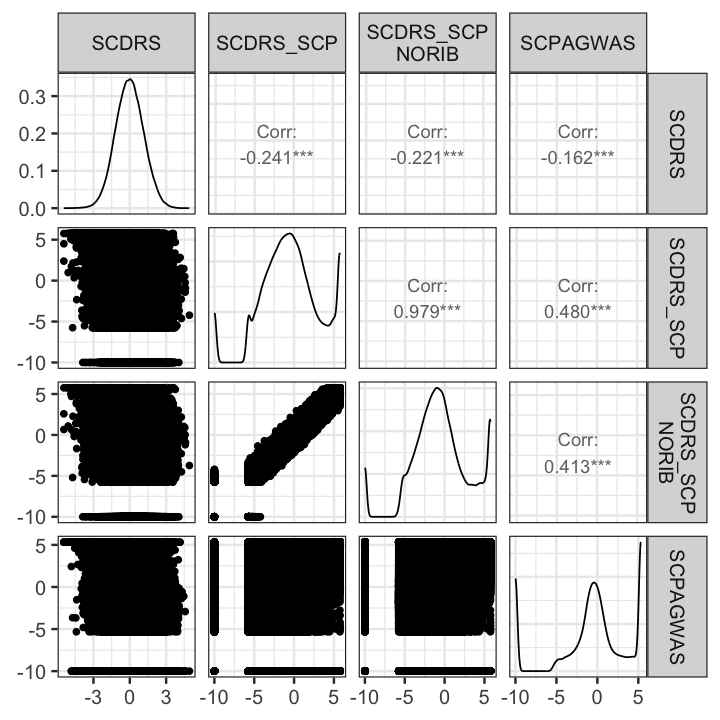

In [134]:
options(repr.plot.width=6, repr.plot.height=6)
colnames(corr_graph) <- c("SCDRS", "SCDRS_SCP", "SCDRS_SCP\nNORIB", "SCPAGWAS")
ggpairs(corr_graph, 
        upper = list(continuous = wrap(ggally_cor, method = "spearman"))) + 
theme_bw(base_size=15)

ggsave("UC_corr_plot_cell_zscores.png", dpi=300, width=6, height=6)

,SCDRS,SCDRS_SCP,SCDRS_SCP_NORIB,SCPAGWAS
,<dbl>,<dbl>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,1.9569362,-1.2495180,-1.520704,-0.1741075
N7.EpiA.AACTCGGACGTAAC,0.4600263,0.9391654,1.872858,-0.7046620


[1] 29489     4

,SCDRS,SCDRS_SCP,SCDRS_SCP_NORIB,SCPAGWAS
SCDRS,1.0000000,-0.2503461,-0.2351822,-0.1489265
SCDRS_SCP,-0.2503461,1.0000000,0.9763601,0.3568599
SCDRS_SCP_NORIB,-0.2351822,0.9763601,1.0000000,0.2939132
SCPAGWAS,-0.1489265,0.3568599,0.2939132,1.0000000


,SCDRS,SCDRS_SCP,SCDRS_SCP_NORIB,SCPAGWAS
SCDRS,1.00000000,-0.1285448,-0.1112550,0.06620893
SCDRS_SCP,-0.12854477,1.0000000,0.9783576,-0.78333983
SCDRS_SCP_NORIB,-0.11125495,0.9783576,1.0000000,-0.77741426
SCPAGWAS,0.06620893,-0.7833398,-0.7774143,1.00000000


,SCDRS,SCDRS_SCP,SCDRS_SCP_NORIB,SCPAGWAS
SCDRS,1.00000000,-0.1125700,-0.09754122,0.06642068
SCDRS_SCP,-0.11257001,1.0000000,0.98621746,-0.68455461
SCDRS_SCP_NORIB,-0.09754122,0.9862175,1.00000000,-0.68266838
SCPAGWAS,0.06642068,-0.6845546,-0.68266838,1.00000000


[1] 270

[1] 5949

[1] 23270

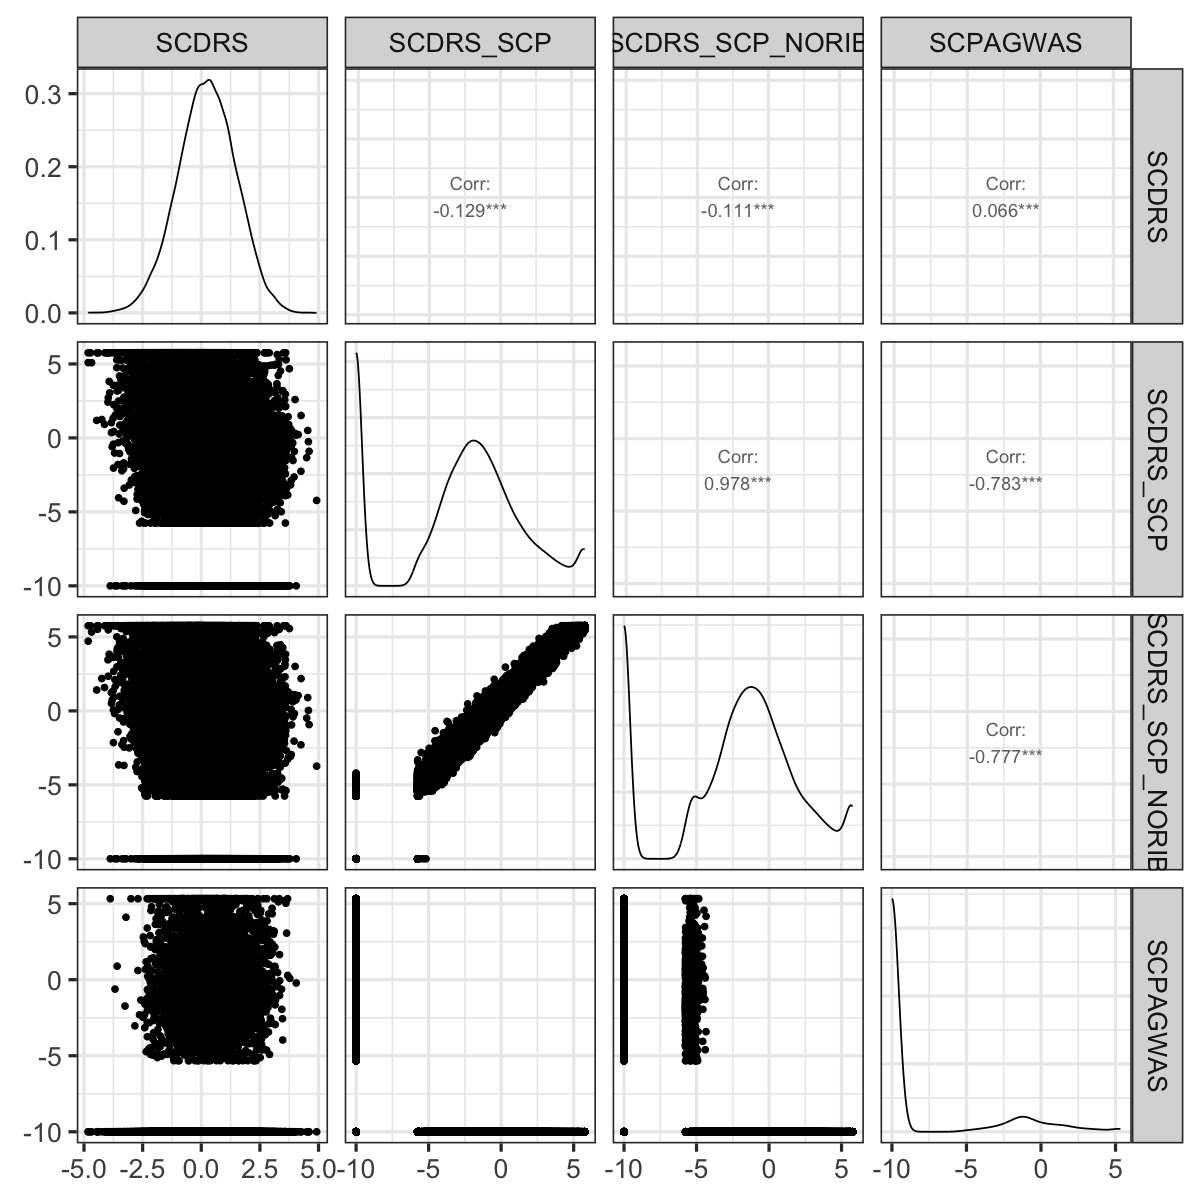

In [21]:
# Try again but remove or only include the cells with -10
corr_graph[1:2,]
corr_graph_10 = corr_graph[corr_graph$SCDRS_SCP == -10 | corr_graph$SCPAGWAS == -10,]
dim(corr_graph_10)
cor(corr_graph)
cor(corr_graph_10)
cor(corr_graph_10, method = "spearman")
options(repr.plot.height=10, repr.plot.width=10)
ggpairs(corr_graph_10) + theme_bw(base_size=20)

# are the same cells being -10
scdrs_scp_10 = rownames(corr_graph[corr_graph$SCDRS_SCP == -10,])
scgpwas_scp_10 = rownames(corr_graph[corr_graph$SCPAGWAS == -10,])
length(intersect(scdrs_scp_10, scgpwas_scp_10))
length(setdiff(scdrs_scp_10, scgpwas_scp_10))
length(setdiff(scgpwas_scp_10, scdrs_scp_10))

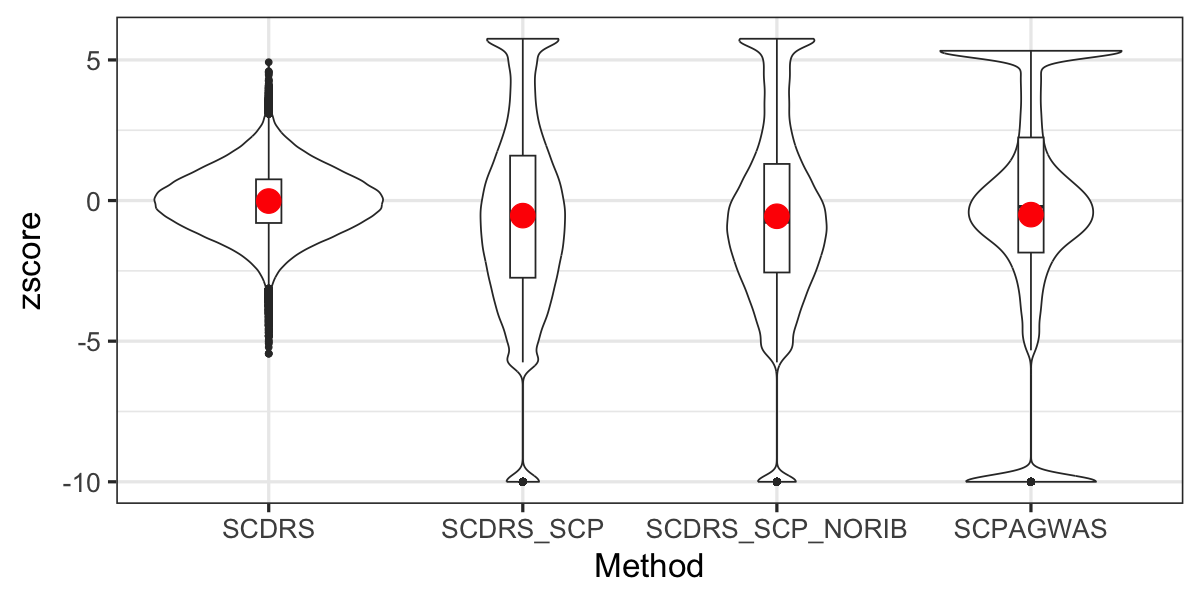

In [22]:
# plot the distributions of zscores
options(repr.plot.width=10, repr.plot.height=5)
corr_graph %>%
   pivot_longer(everything(), values_to="zscore", names_to="Method") %>%
   ggplot(aes(x=Method, y=zscore)) + geom_violin() + geom_boxplot(width=0.1) + theme_bw(base_size=20) + 
   stat_summary(fun=mean, geom="point", shape=20, size=10, color="red")

## Compare which cell types seem to have -10 extreme values in scDRS vs SCPagwas

In [24]:
scdrs_10 <- data.frame(table(meta_data[meta_data$zscore_scp == -10,]$cluster))
scdrs_norib_10 <- data.frame(table(meta_data[meta_data$zscore_scp_norib == -10,]$cluster))
scpagwas_10 <- data.frame(table(meta_data[meta_data$Random_Correct_BG_z == -10,]$cluster))

# all clusters considered
clusters_cons <- union(union(scdrs_10$Var1, scdrs_norib_10$Var1), scpagwas_10$Var1)
length(clusters_cons)
# get to have the same clusters
scdrs_only = setdiff(clusters_cons,  scpagwas_10$Var1)
add_10 = as.data.table(list("Var1"=scdrs_only, "Freq"=rep(0, length(scdrs_only))))
scpagwas_10 = rbind(scpagwas_10, add_10)

scpagwas_only = setdiff(clusters_cons,  scdrs_10$Var1)
add_10 = as.data.table(list("Var1"=scpagwas_only, "Freq"=rep(0, length(scpagwas_only))))
scdrs_10 = rbind(scdrs_10, add_10)

scpagwas__scdrs = setdiff(clusters_cons, scdrs_norib_10$Var1)
add_10 = as.data.table(list("Var1"=scpagwas__scdrs, "Freq"=rep(0, length(scpagwas__scdrs))))
scdrs_norib_10 = rbind(scdrs_norib_10, add_10)

# need to divide by total
sub <- meta_data[meta_data$cluster %in% scdrs_10$Var1,]
num <- data.frame(table(sub$cluster))
num[1:2,]
dim(num)
dim(scdrs_10)
dim(scdrs_norib_10)
dim(scpagwas_10)

scdrs_10[scdrs_10$Var1 == "Best4+ Enterocytes",]$Freq

# for each cell type get the info
celltype_list = c(); method_list = c(); proportion_list = c()
for (celltype in unique(scdrs_10$Var1)) {
    celltype_list = c(celltype_list, celltype, celltype, celltype)
    method_list = c(method_list, "SCDRS_SCP", "SCDRS_SCP_NORIB", "SCPAGWAS")
    prop_scdrs = scdrs_10[scdrs_10$Var1 == celltype,]$Freq/num[num$Var1 == celltype,]$Freq
    prop_scdrs_norib = scdrs_norib_10[scdrs_norib_10$Var1 == celltype,]$Freq/num[num$Var1 == celltype,]$Freq
    prop_scpgwas = scpagwas_10[scpagwas_10$Var1 == celltype,]$Freq/num[num$Var1 == celltype,]$Freq
    cat("\n", celltype, prop_scdrs, prop_scdrs_norib, prop_scpgwas)
    proportion_list = c(proportion_list, prop_scdrs, prop_scdrs_norib, prop_scpgwas)
    
    }
celltype_list[1:2]
plot_df <- as.data.table(list("Celltype"=celltype_list, "Method"=method_list, "Proportion"=proportion_list))
plot_df[1:2,]

[1] 33

,Var1,Freq
,<fct>,<int>
1,Best4+ Enterocytes,1609
2,CD4+ Activated Fos-hi,8498


[1] 33  2

[1] 33  2

[1] 33  2

[1] 33  2

[1] 107


 Best4+ Enterocytes 0.06650093 0.05717837 0.0149161
 CD4+ Activated Fos-hi 0.006119087 0.008590257 0.001059073
 CD4+ Activated Fos-lo 0.0006648936 0.001196809 0.0002659574
 CD4+ Memory 0.0001797807 0.0002996344 0.0009588302
 CD4+ PD1+ 0.007792208 0.007792208 0
 CD69+ Mast 0.002748511 0.002290426 0.006871278
 CD8+ IELs 0.03155604 0.03917301 0.001088139
 CD8+ IL17+ 0.04474273 0.049217 0
 CD8+ LP 0.00772093 0.00855814 0.002511628
 Cycling B 0.1945826 0.2017689 0.05638474
 Cycling T 0.2762646 0.2490272 0.001945525
 Cycling TA 0.007472974 0.01451063 0.001451063
 Enterocytes 0.06235698 0.02002288 0.04633867
 Enteroendocrine 0.01769912 0.01769912 0
 Follicular 0.002332513 0.003433977 0.009330051
 GC 0.0303712 0.04499438 0.02474691
 Goblet 0.02288732 0.008802817 0.2235915
 ILCs 0.002314815 0.002314815 0.00462963
 Immature Enterocytes 1 0.02932255 0.007077856 0.1870576
 Immature Enterocytes 2 0.1367101 0.08999262 0.01180231
 Immature Goblet 0.0004280822 0.0002140411 0.001284247
 M cells 0.0235

[1] "Best4+ Enterocytes" "Best4+ Enterocytes"

Celltype,Method,Proportion
<chr>,<chr>,<dbl>
Best4+ Enterocytes,SCDRS_SCP,0.06650093
Best4+ Enterocytes,SCDRS_SCP_NORIB,0.05717837


In [26]:
cat("\nNumber total of cells with -10\t\t", "SCDRS_SCP:", sum(scdrs_10$Freq), "\tSCDRS_SCP_NORIB:", sum(scdrs_norib_10$Freq), "\tSCGPAGWAS:", sum(scpagwas_10$Freq))


Number total of cells with -10		 SCDRS_SCP: 6219 	SCDRS_SCP_NORIB: 6471 	SCGPAGWAS: 23540

In [175]:
dim(meta_data)
23540/198389
6219/198389
6471/198389

[1] 198389     27

[1] 0.1186558

[1] 0.0313475

[1] 0.03261774

In [136]:
high_cts <- plot_df[plot_df$Proportion > 0.01,]$Celltype
length(unique(plot_df$Celltype))
length(unique(high_cts))

[1] 33

[1] 17

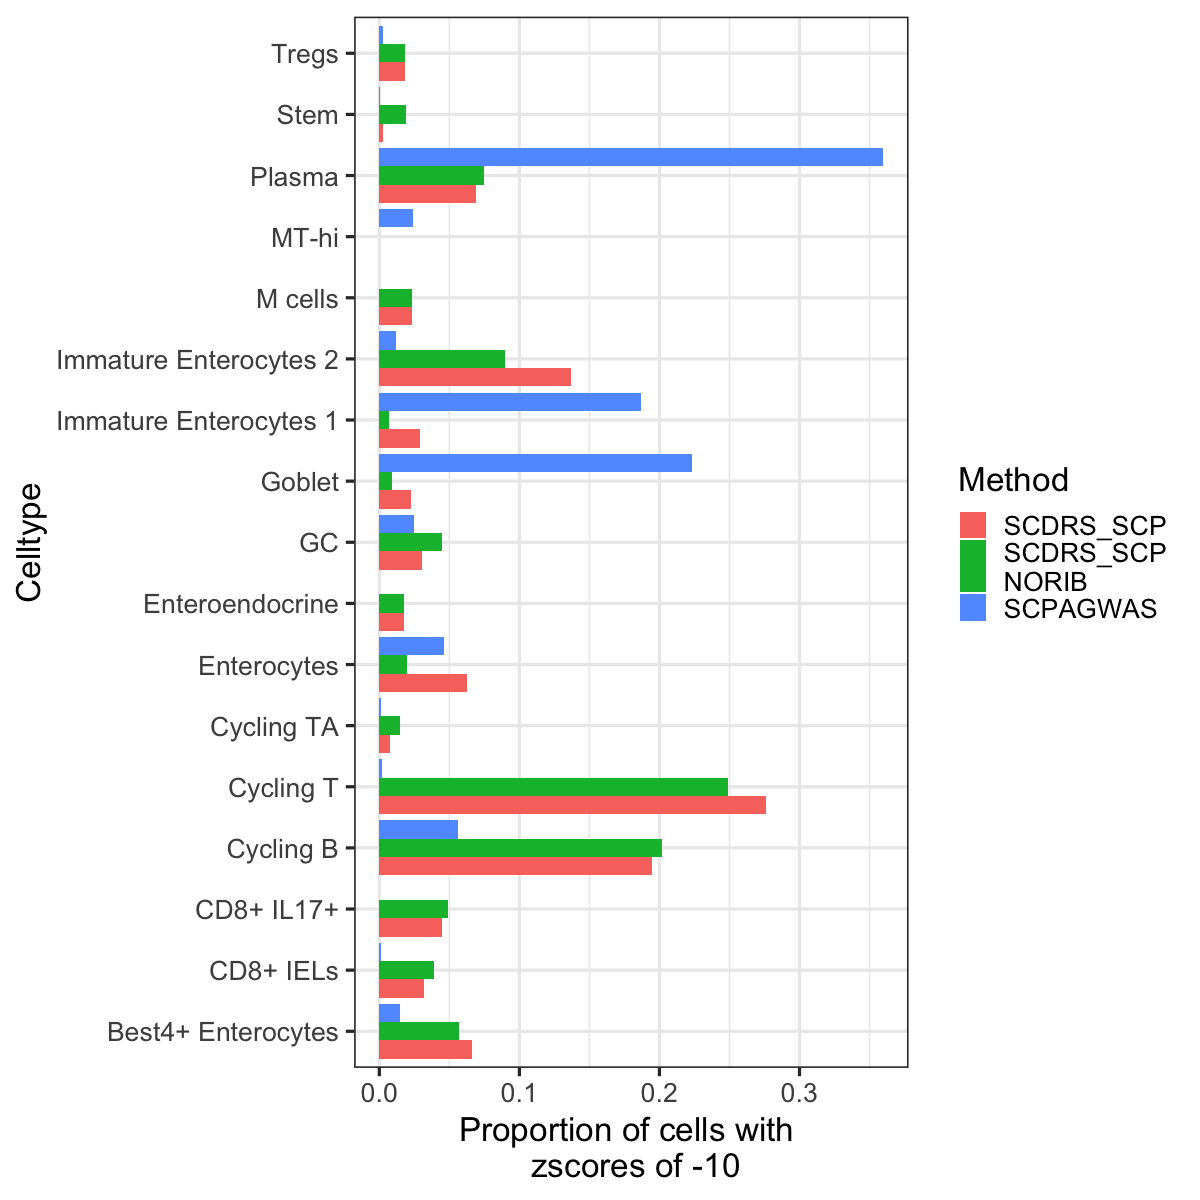

In [137]:
options(repr.plot.height=10, repr.plot.width=10)
plot_df[plot_df$Method == "SCDRS_SCP_NORIB",]$Method <- "SCDRS_SCP\nNORIB"
ggplot(plot_df[plot_df$Celltype %in% high_cts,]) + geom_bar(aes(x=Celltype, y=Proportion, fill=Method), 
                                                            stat="identity", position="dodge") + 
theme_bw(base_size=20) + coord_flip() + labs(y="Proportion of cells with \n zscores of -10")
ggsave("UC_extreme_zscore_celltypeprops.png", dpi=300, width=10, height=10)

### See if these cell types coordinate with the ones with high ribosomal counts (gene analysis)

In [28]:
# Get the RP genes from SCPAGWAS to consider
uc_scpagwas_genes <- fread("/Users/hopekirby/Downloads/scpgwas/UC_output_micro/UCmicro_white_10.22.24_gene_PCC.csv")
uc_scpagwas_genes[1:2,]
# get the rank
uc_scpagwas_genes$RANK <- 0
uc_scpagwas_genes[order(-uc_scpagwas_genes$PCC),]$RANK = seq(0, nrow(uc_scpagwas_genes)-1)
uc_scpagwas_genes[1:4,]
uc_scpagwas_genes <- uc_scpagwas_genes[uc_scpagwas_genes$RANK < 1000,]
dim(uc_scpagwas_genes)
RP_genes <- uc_scpagwas_genes$V1[grepl("^RP", uc_scpagwas_genes$V1)]
RP_genes[1:4]
length(RP_genes)

V1,PCC
<chr>,<dbl>
7SK,-0.006141705
A1BG,0.009412774


V1,PCC,RANK
<chr>,<dbl>,<dbl>
7SK,-0.006141705,16430
A1BG,0.009412774,7557
A1BG-AS1,0.004461475,10827
A1CF,-0.011485797,17060


[1] 1000    3

[1] "RP11-1143G9.4" "RP11-14N7.2"   "RPL10"         "RPL10A"

[1] 82

In [29]:
# read in the normalized count data
norm <- readRDS("/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/Simile_UC/exprs_norm_qc_ulcerative_colitis_gut.rds")
norm[1:2,1:3]
dim(norm)
# only keep cells in meta_data
norm <- norm[,meta_data$cell]
# only keep RP genes used in SCPAGWAS
norm <- norm[RP_genes,]
dim(norm)
norm[1:2,1:3]

                                                              
# plot the RP gene expression across the different cells overall and within cell states: -10 z score vs + 10 zscore
exp_plot <- data.table("cell"=colnames(norm), "RP_exp"=colSums(norm), "scdrs_zscore"=meta_data$zscore_scp, "scpagwas_zscore"=meta_data$Random_Correct_BG_z)
# plot a scatter plot with z score and RP expression 
exp_plot[1:3,]

2 x 3 sparse Matrix of class "dgCMatrix"
     N7.EpiA.AACAAACTTCTCCG N7.EpiA.AACTCGGACGTAAC N7.EpiA.AACTCGGATGAGGG
7SK                       .                      .                      .
A1BG                      .                      .                      .

[1]  18172 228211

[1]     82 198389

2 x 3 sparse Matrix of class "dgCMatrix"
              N7.EpiA.AACAAACTTCTCCG N7.EpiA.AACTCGGACGTAAC
RP11-1143G9.4                      .                      .
RP11-14N7.2                        .                      .
              N7.EpiA.AAGCAAGAGTCAAC
RP11-1143G9.4                      .
RP11-14N7.2                        .

cell,RP_exp,scdrs_zscore,scpagwas_zscore
<chr>,<dbl>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,209.8441,-1.2495180,-0.1741075
N7.EpiA.AACTCGGACGTAAC,108.2213,0.9391654,-0.7046620
N7.EpiA.AAGCAAGAGTCAAC,238.9115,0.5422729,5.3252541


In [30]:
cor(exp_plot$RP_exp, exp_plot$scdrs_zscore)
cor(exp_plot$RP_exp, exp_plot$scpagwas_zscore)

[1] 0.1712924

[1] 0.5812152

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,2647545,141.4,4796800,256.2,NA,4796800,256.2
Vcells,19451909,148.5,794788314,6063.8,16384,850309407,6487.4


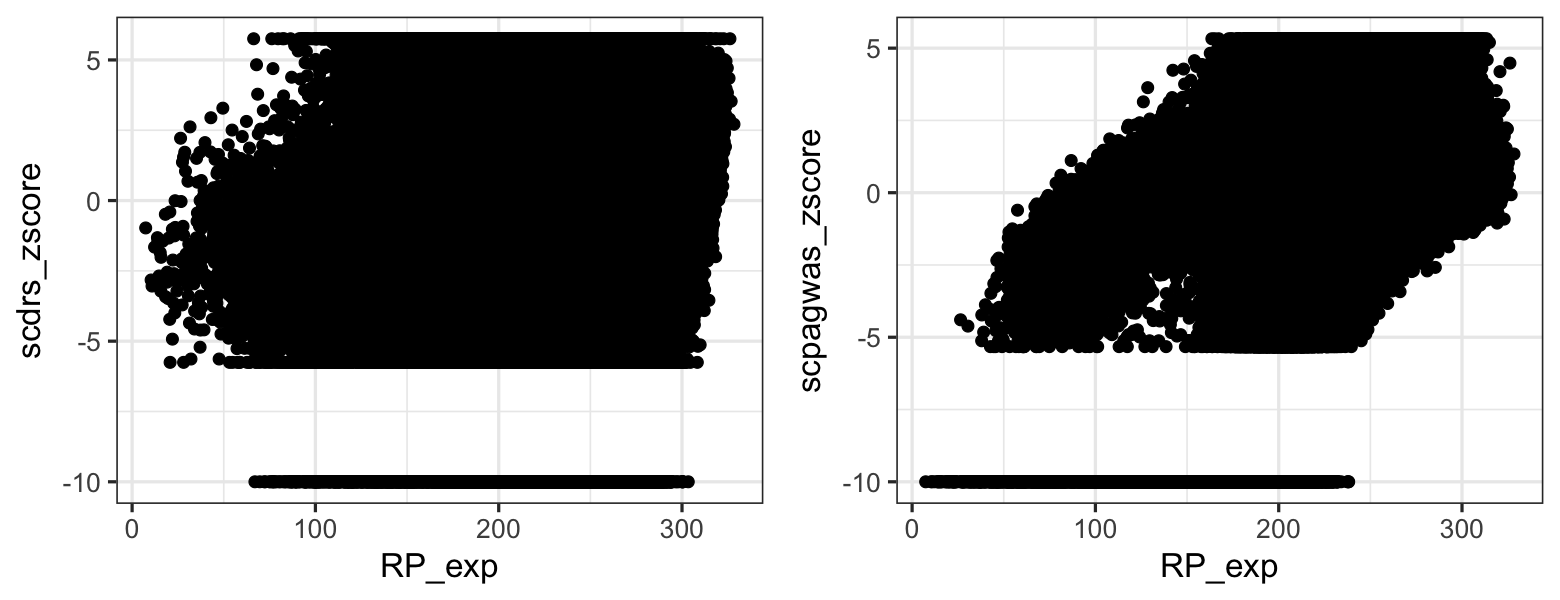

In [31]:
rm(norm)
gc()
p1 <- ggplot(exp_plot, aes(x=RP_exp, y=scdrs_zscore)) + geom_point(size=3) + theme_bw(base_size=20)
p2 <- ggplot(exp_plot, aes(x=RP_exp, y=scpagwas_zscore)) + geom_point(size=3) + theme_bw(base_size=20)
options(repr.plot.height=5, repr.plot.width=13)
plot_grid(p1, p2, nrow=1)

In [32]:
exp_plot$neg_10_scdrs <- FALSE
exp_plot$neg_10_scpagwas <- FALSE
exp_plot[exp_plot$cell %in% meta_data[meta_data$zscore_scp == -10,]$cell,]$neg_10_scdrs <- TRUE
exp_plot[exp_plot$cell %in% meta_data[meta_data$Random_Correct_BG_z == -10,]$cell,]$neg_10_scpagwas <- TRUE
table(exp_plot$neg_10_scdrs)
table(exp_plot$neg_10_scpagwas)


 FALSE   TRUE 
192170   6219 


 FALSE   TRUE 
174849  23540 

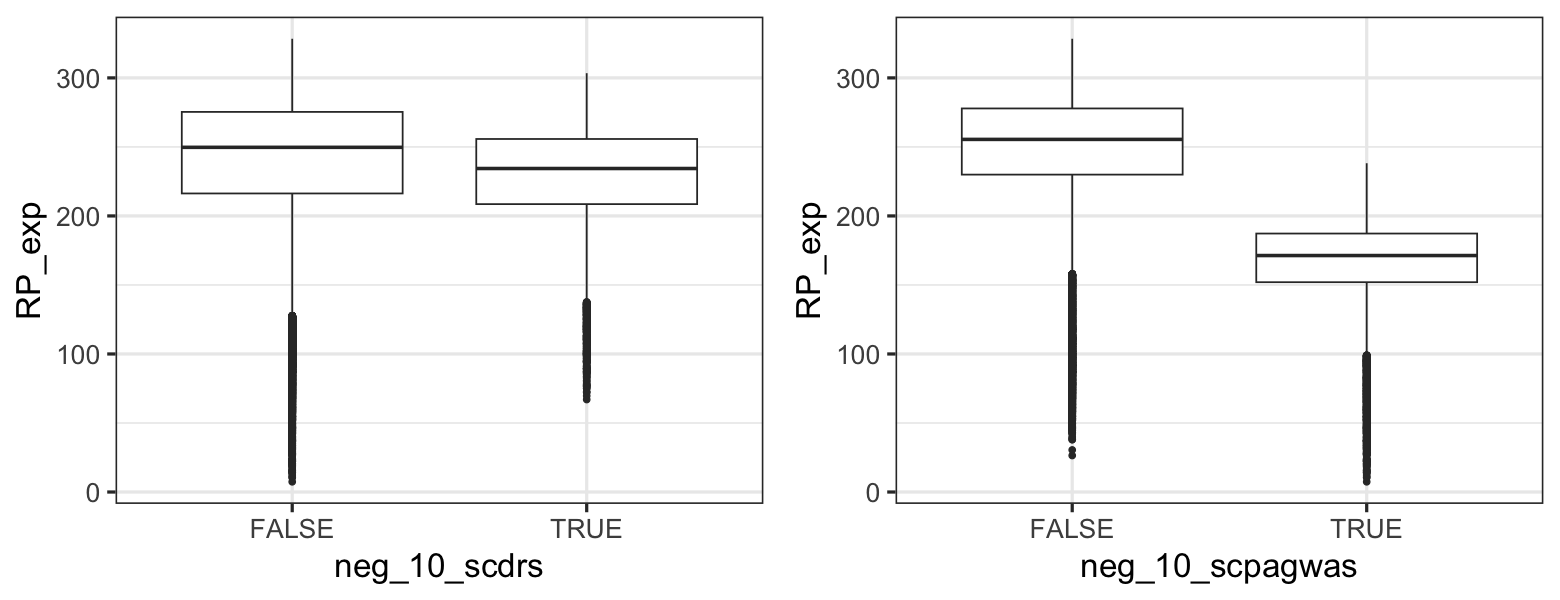

In [33]:
p1 <- ggplot(exp_plot, aes(x=neg_10_scdrs, y=RP_exp)) + geom_boxplot() + theme_bw(base_size=20)
p2 <- ggplot(exp_plot, aes(x=neg_10_scpagwas, y=RP_exp)) + geom_boxplot() + theme_bw(base_size=20)
plot_grid(p1, p2, nrow=1)

In [34]:
t.test(exp_plot[exp_plot$neg_10_scdrs == TRUE,]$RP_exp, exp_plot[exp_plot$neg_10_scdrs == FALSE,]$RP_exp)
t.test(exp_plot[exp_plot$neg_10_scpagwas == TRUE,]$RP_exp, exp_plot[exp_plot$neg_10_scpagwas == FALSE,]$RP_exp)


	Welch Two Sample t-test

data:  exp_plot[exp_plot$neg_10_scdrs == TRUE, ]$RP_exp and exp_plot[exp_plot$neg_10_scdrs == FALSE, ]$RP_exp
t = -26.695, df = 6772.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.16854 -13.09316
sample estimates:
mean of x mean of y 
 226.7694  240.9002 



	Welch Two Sample t-test

data:  exp_plot[exp_plot$neg_10_scpagwas == TRUE, ]$RP_exp and exp_plot[exp_plot$neg_10_scpagwas == FALSE, ]$RP_exp
t = -387.05, df = 36163, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -83.87244 -83.02726
sample estimates:
mean of x mean of y 
 166.9092  250.3591 


# Plot the final zscores and significance calls

## Read in and clean SCGWAS data

In [15]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/UC/10kb/"
scgwas_macro <- fread(paste0(scgwas_dir, "UC_celltypes.sig_module.txt"))
scgwas_micro <- fread(paste0(scgwas_dir, "UC_clusters.sig_module.txt"))

In [16]:
scgwas_macro_count <- data.frame(table(scgwas_macro$cell_type))
scgwas_macro_count <- scgwas_macro_count[order(-scgwas_macro_count$Freq),]
freq_dict = list()
rank = 1
# create a dictionary based on the numbers provided:
for (freq in unique(scgwas_macro_count$Freq)) {
    freq_dict[freq] = rank
    rank = rank + 1
    }
rank_freq_list = c()
# then change the rank_freq
for (freq in scgwas_macro_count$Freq) {
    rank_freq_list <- c(rank_freq_list, freq_dict[freq])
    }
scgwas_macro_count$rank_freq <- rank_freq_list

scgwas_macro_count$rank_freq <- as.character(scgwas_macro_count$rank_freq)
unique(scgwas_macro_count$rank_freq)



scgwas_micro_count <- data.frame(table(scgwas_micro$cell_type))
scgwas_micro_count <- scgwas_micro_count[order(-scgwas_micro_count$Freq),]
freq_dict = list()
rank = 1
# create a dictionary based on the numbers provided:
for (freq in unique(scgwas_micro_count$Freq)) {
    freq_dict[freq] = rank
    rank = rank + 1
    }
rank_freq_list = c()
# then change the rank_freq
for (freq in scgwas_micro_count$Freq) {
    rank_freq_list <- c(rank_freq_list, freq_dict[freq])
    }
scgwas_micro_count$rank_freq <- rank_freq_list

scgwas_micro_count$rank_freq <- as.character(scgwas_micro_count$rank_freq)
unique(scgwas_micro_count$rank_freq)


[1] "1"

[1] "1" "2" "3"

In [17]:
names(meta_colors)
unique(meta_data$macro)

[1] "Immature Goblet"          "Goblet"                  
 [3] "TA 1"                     "TA 2"                    
 [5] "Cycling TA"               "Secretory TA"            
 [7] "Immature Enterocytes 1"   "Immature Enterocytes 2"  
 [9] "Enteroendocrine"          "Enterocyte Progenitors"  
[11] "Best4+ Enterocytes"       "Enterocytes"             
[13] "Stem"                     "Tuft"                    
[15] "M cells"                  "WNT2B+ Fos-lo 1"         
[17] "WNT2B+ Fos-lo 2"          "WNT2B+ Fos-hi"           
[19] "WNT5B+ 1"                 "WNT5B+ 2"                
[21] "Myofibroblasts"           "RSPO3+"                  
[23] "Inflammatory Fibroblasts" "Endothelial"             
[25] "Microvascular"            "Post-capillary Venules"  
[27] "Pericytes"                "Glia"                    
[29] "Plasma"                   "Cycling B"               
[31] "Follicular"               "GC"                      
[33] "MT-hi"                    "Cycling T"               
[35] "NKs"                      "ILCs"                    
[37] "CD8+ IELs"                "CD8+ LP"                 
[39] "CD8+ IL17+"               "CD4+ Activated Fos-hi"   
[41] "CD4+ Activated Fos-lo"    "CD4+ Memory"             
[43] "CD4+ PD1+"                "Tregs"                   
[45] "Macrophages"              "DC1"                     
[47] "DC2"                      "CD69+ Mast"              
[49] "CD69- Mast"               "Cycling Monocytes"       
[51] "Inflammatory Monocytes"

[1] "Epithelial" "Fibroblast" "B_cell"     "T_cell"     "Myeloid"

In [18]:
# add the groups that have 0 counts to the thing
scgwas_0_list <- c(unique(meta_data$macro), scgwas_macro_count$Var1)
Var1 <- as.vector(scgwas_macro_count$Var1)
new_Var1 <- c(Var1, scgwas_0_list)
new_Freq <- c(scgwas_macro_count$Freq, rep(0, length(scgwas_0_list)))
new_rank_freq <- c(scgwas_macro_count$rank_freq, rep(" ", length(scgwas_0_list)))
scgwas_macro_count <- data.frame(group = new_Var1, 
                            Freq = new_Freq, 
                            rank_freq = new_rank_freq)
scgwas_macro_count[1:2,]

# add the groups that have 0 counts to the thing
scgwas_0_list <- c(setdiff(names(meta_colors), scgwas_micro_count$Var1))
Var1 <- as.vector(scgwas_micro_count$Var1)
new_Var1 <- c(Var1, scgwas_0_list)
new_Freq <- c(scgwas_micro_count$Freq, rep(0, length(scgwas_0_list)))
new_rank_freq <- c(scgwas_micro_count$rank_freq, rep(" ", length(scgwas_0_list)))
scgwas_micro_count <- data.frame(group = new_Var1, 
                            Freq = new_Freq, 
                            rank_freq = new_rank_freq)
scgwas_micro_count[1:2,]

,group,Freq,rank_freq
,<chr>,<dbl>,<chr>
1,Epithelial,1,1
2,Epithelial,0,


,group,Freq,rank_freq
,<chr>,<dbl>,<chr>
1,M cells,3,1
2,Cycling TA,2,2


In [19]:
colnames(meta_data)

[1] "cell"                    "sample"                 
 [3] "disease"                 "cell_type"              
 [5] "cluster"                 "nGene"                  
 [7] "nUMI"                    "percent_mito"           
 [9] "macro"                   "Gender"                 
[11] "Location"                "Smoking"                
[13] "bt_score"                "bt_score_macro"         
[15] "Z_score_micro"           "Z_score_macro"          
[17] "Z_score_micro_scp"       "Z_score_micro_scp_norib"
[19] "mc_pval"                 "zscore"                 
[21] "mc_pval_scp"             "zscore_scp"             
[23] "mc_pval_scp_norib"       "zscore_scp_norib"       
[25] "scPagwas.TRS.Score"      "Random_Correct_BG_adjp" 
[27] "Random_Correct_BG_z"

## Large scale cell states

In [20]:
ranked_cell_types <- c("Fibroblast", "B_cell", "Myeloid", "Epithelial", "T_cell")
scdrs_sig_cell_types <- macro_table[macro_table$assoc_mcp < 0.05,]$group
length(scdrs_sig_cell_types)
scdrs_sig_cell_types

scpgwas_sig_cell_types <- scp_type_scores_macro[scp_type_scores_macro$pvalue < 0.05,]$celltype
length(scpgwas_sig_cell_types)
scpgwas_sig_cell_types

scgwas_sig_cell_types <- scgwas_macro_count[scgwas_macro_count$Freq > 0,]$group
length(scgwas_sig_cell_types)
scgwas_sig_cell_types



[1] 2

[1] "B_cell"     "Epithelial"

[1] 3

[1] "Epithelial" "Fibroblast" "Myeloid"

[1] 1

[1] "Epithelial"

In [21]:
# add cell type to scgwas_micro
scgwas_macro_graph <- scgwas_macro[,c("cell_type", "module_score_z")]
scgwas_macro_graph[scgwas_macro_graph$cell_type == "B cell",]$cell_type <- "B_cell"
scgwas_macro_graph[scgwas_macro_graph$cell_type == "T cell",]$cell_type <- "T_cell"
unique(scgwas_macro_graph$cell_type)
unique(meta_data$macro)
scgwas_macro_graph[1:2,]
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(ranked_cell_types, scgwas_macro$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(ranked_cell_types, scgwas_macro$cell_type)))))
scgwas_macro_graph <- rbind(scgwas_macro_graph, add_df)              

# add z_score
Z_scores <- c()
for (cell_type in scgwas_macro_graph$cell_type) {
    Z_scores <- c(Z_scores, meta_data[meta_data$macro == cell_type,]$Z_score_macro[1])
    }
scgwas_macro_graph$Z_score <- Z_scores
scgwas_macro_graph

[1] "Epithelial"

[1] "Epithelial" "Fibroblast" "B_cell"     "T_cell"     "Myeloid"

cell_type,module_score_z
<chr>,<dbl>
Epithelial,3.173368
NA,NA


cell_type,module_score_z,Z_score
<chr>,<dbl>,<dbl>
Epithelial,3.173368,2.61759970
Fibroblast,0.000000,-2.46032790
B_cell,0.000000,2.81031180
Myeloid,0.000000,0.01159695
T_cell,0.000000,0.27721795


In [22]:
# figure out color breaks
colnames(meta_data)
min(meta_data$Z_score_micro)
max(meta_data$Z_score_micro)
min(meta_data$Z_score_micro_scp)
max(meta_data$Z_score_micro_scp)

min(meta_data$bt_score)
max(meta_data$bt_score)


breaks_use = c(-14.5, -8, -3, -1, 1, 3, 8, 17)
limits_use = c('(-14.5,-8]', '(-8,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,8]', '(8,17]')
color_values = c('blue', '#0571b0', '#92c5de','black', "#f4a582", '#ca0020', 'brown')

[1] "cell"                    "sample"                 
 [3] "disease"                 "cell_type"              
 [5] "cluster"                 "nGene"                  
 [7] "nUMI"                    "percent_mito"           
 [9] "macro"                   "Gender"                 
[11] "Location"                "Smoking"                
[13] "bt_score"                "bt_score_macro"         
[15] "Z_score_micro"           "Z_score_macro"          
[17] "Z_score_micro_scp"       "Z_score_micro_scp_norib"
[19] "mc_pval"                 "zscore"                 
[21] "mc_pval_scp"             "zscore_scp"             
[23] "mc_pval_scp_norib"       "zscore_scp_norib"       
[25] "scPagwas.TRS.Score"      "Random_Correct_BG_adjp" 
[27] "Random_Correct_BG_z"

[1] -2.385684

[1] 3.158441

[1] -3.702681

[1] 16.5342

[1] -6.04072

[1] 4.115229

In [23]:
setdiff(ranked_cell_types, meta_data$macro)
setdiff(meta_data$macro, ranked_cell_types)

character(0)

character(0)

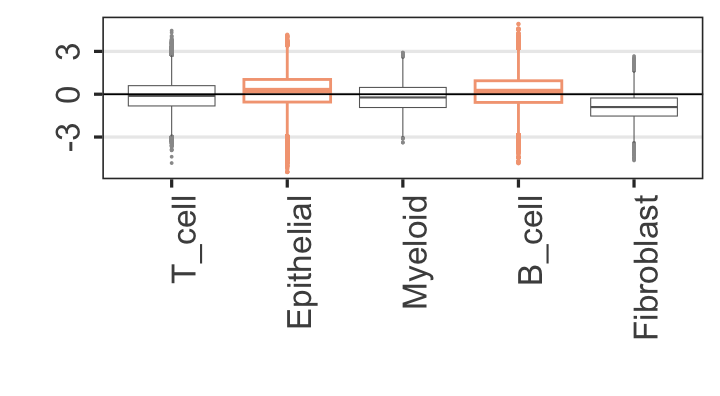

In [50]:
# SCDRS

data2 = meta_data[meta_data$macro %in% scdrs_sig_cell_types,]
data1 = meta_data[!meta_data$macro %in% scdrs_sig_cell_types,]

options(repr.plot.height = 3.3, repr.plot.width =6 ) #[meta_data$pval < 0.1,]

p_scdrs <- ggplot(meta_data, aes(x=factor(macro, levels=ranked_cell_types), y=zscore, color=cut(Z_score_macro, breaks = breaks_use))) +
geom_boxplot(data=data1, color="grey40", aes(x=factor(macro, levels=rev(ranked_cell_types))), linewidth=0.3, outlier.colour = "grey60", outlier.size=0.4) +  
geom_boxplot(data=data2, linewidth=0.8, outlier.size=0.6, aes(x=factor(macro, levels=rev(ranked_cell_types))),) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
scale_color_manual(values = color_values,
                   limits = limits_use) +
scale_x_discrete(limits=rev(ranked_cell_types)) + 
theme_bw(base_size=20) + 
theme( 
      axis.text.x = element_text(angle=90, size=20, hjust=1),legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


p_scdrs


# ggsave("./scDRS_UC_Label_full_LIMITED.pdf", height=5, width=22.5)
# save_plot("./scDRS_UC_Label_full_LIMITED.svg", fig = p1, width=22.5, height=5)

In [29]:
colnames(meta_data)

[1] "cell"                    "sample"                 
 [3] "disease"                 "cell_type"              
 [5] "cluster"                 "nGene"                  
 [7] "nUMI"                    "percent_mito"           
 [9] "macro"                   "Gender"                 
[11] "Location"                "Smoking"                
[13] "bt_score"                "bt_score_macro"         
[15] "Z_score_micro"           "Z_score_macro"          
[17] "Z_score_micro_scp"       "Z_score_micro_scp_norib"
[19] "mc_pval"                 "zscore"                 
[21] "mc_pval_scp"             "zscore_scp"             
[23] "mc_pval_scp_norib"       "zscore_scp_norib"       
[25] "scPagwas.TRS.Score"      "Random_Correct_BG_adjp" 
[27] "Random_Correct_BG_z"

[1] "B_cell"     "Epithelial"

[1] "Epithelial" "Fibroblast" "Myeloid"

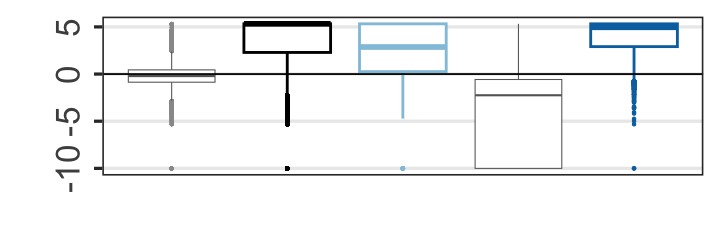

In [51]:
# scPagwas
scdrs_sig_cell_types
scpgwas_sig_cell_types

# SCDRS

data2 = meta_data[meta_data$macro %in% scpgwas_sig_cell_types,]
data1 = meta_data[!meta_data$macro %in% scpgwas_sig_cell_types,]

options(repr.plot.height = 2, repr.plot.width =6 ) #[meta_data$pval < 0.1,]

p_scpagwas <- ggplot(meta_data, aes(x=factor(macro, levels=ranked_cell_types), y=Random_Correct_BG_z, color=cut(bt_score_macro, breaks = breaks_use))) +
geom_boxplot(data=data1, color="grey40", aes(x=factor(macro, levels=rev(ranked_cell_types))), linewidth=0.3, outlier.colour = "grey60", outlier.size=0.4) +  
geom_boxplot(data=data2, linewidth=0.8, outlier.size=0.6, aes(x=factor(macro, levels=rev(ranked_cell_types))),) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
scale_color_manual(values = color_values,
                   limits = limits_use) +
scale_x_discrete(limits=rev(ranked_cell_types)) + 
theme_bw(base_size=20) + 
theme( 
      axis.text.x = element_blank(), axis.ticks.x = element_blank() ,legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


p_scpagwas


# ggsave("./scDRS_UC_Label_full_LIMITED.pdf", height=5, width=22.5)
# save_plot("./scDRS_UC_Label_full_LIMITED.svg", fig = p1, width=22.5, height=5)

cell_type,module_score_z,Z_score
<chr>,<dbl>,<dbl>
Epithelial,3.173368,2.61759970
Fibroblast,0.000000,-2.46032790
B_cell,0.000000,2.81031180
Myeloid,0.000000,0.01159695
T_cell,0.000000,0.27721795


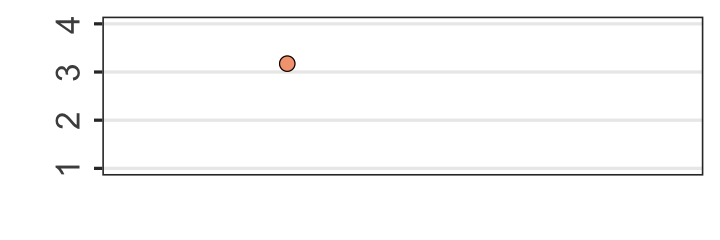

In [52]:
# SCGWAS
options(warn=-1)
scgwas_macro_graph
options(repr.plot.height = 2, repr.plot.width =6 )
p_scgwas <- ggplot(scgwas_macro_graph, aes(x=factor(cell_type, levels=ranked_cell_types), 
                                           y=module_score_z, color=cut(Z_score, breaks = breaks_use))) +
geom_point(size=4) +  geom_point(shape = 1,size = 4,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=20) + 
scale_x_discrete(limits=rev(ranked_cell_types)) + 
theme(legend.position="None", 
     axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_color_manual(values = color_values,
                   limits = limits_use) +
  ylim(1, 4) + labs(x="", y="") 

p_scgwas
# ggsave("./scGWAS_UC_TBE_Zscores_LIMITED.pdf", height=2, width=22.5)
# save_plot("./scGWAS_UC_Label_full_LIMITED.svg",  width=40, height=4,axis.textsize=0.5)

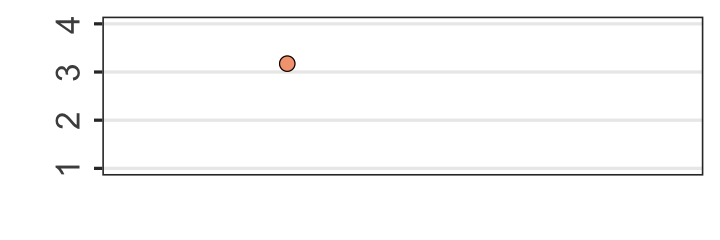

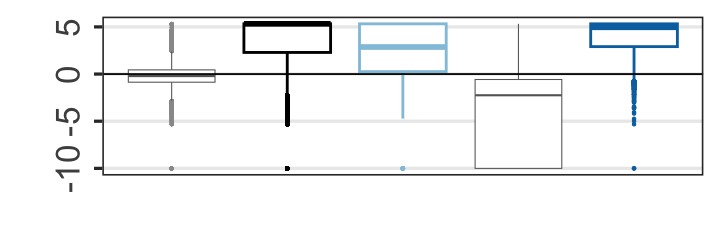

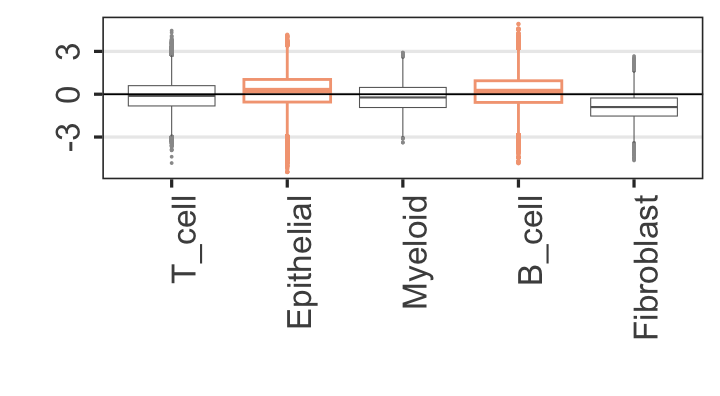

In [56]:
options(repr.plot.height = 2, repr.plot.width =6 )
p_scgwas
ggsave("./UC_macro_scgwas.png", dpi=300, height=2, width=6, unit="in")
p_scpagwas
ggsave("./UC_macro_scpagwas.png", dpi=300, height=2, width=6, unit="in")
options(repr.plot.height = 3.3, repr.plot.width =6 )
p_scdrs
ggsave("./UC_macro_scdrs.png", dpi=300, height=3.3, width=6, unit="in")

## Cell states/clusters

In [100]:
# list to add the ranked clusters within cell types for proper order
ranked_cell_clusters <- c()
for (cell_type in meta_colors1_clean) {
    # get the ranked cells in that group
    data <- micro_table[micro_table$group %in% names(cell_type),]
    data <- data[order(assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

setdiff(unique(meta_data$cluster), ranked_cell_clusters)
setdiff(ranked_cell_clusters, unique(meta_data$cluster))

[1] "Tuft"                     "Enteroendocrine"         
 [3] "Best4+ Enterocytes"       "Stem"                    
 [5] "Goblet"                   "Immature Goblet"         
 [7] "Cycling TA"               "Enterocyte Progenitors"  
 [9] "Secretory TA"             "Immature Enterocytes 1"  
[11] "Immature Enterocytes 2"   "Enterocytes"             
[13] "M cells"                  "WNT2B+ Fos-lo 2"         
[15] "RSPO3+"                   "WNT2B+ Fos-lo 1"         
[17] "WNT2B+ Fos-hi"            "Myofibroblasts"          
[19] "WNT5B+ 2"                 "WNT5B+ 1"                
[21] "Inflammatory Fibroblasts" "Cycling B"               
[23] "GC"                       "Follicular"              
[25] "Plasma"                   "CD69- Mast"              
[27] "CD69+ Mast"               "DC1"                     
[29] "Inflammatory Monocytes"   "DC2"                     
[31] "Cycling Monocytes"        "CD8+ IELs"               
[33] "MT-hi"                    "CD8+ LP"                 
[35] "CD4+ PD1+"                "CD4+ Memory"             
[37] "NKs"                      "CD4+ Activated Fos-lo"   
[39] "CD4+ Activated Fos-hi"    "Cycling T"               
[41] "ILCs"                     "CD8+ IL17+"              
[43] "Tregs"

character(0)

character(0)

In [101]:
# add cell type to scgwas_micro
scgwas_micro_graph <- scgwas_micro[,c("cell_type", "module_score_z")]
scgwas_micro_graph[1:2,]
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(ranked_cell_clusters, scgwas_micro$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(ranked_cell_clusters, scgwas_micro$cell_type)))))
scgwas_micro_graph <- rbind(scgwas_micro_graph, add_df)              
# add z_score
Z_scores <- c()
for (cell_type in scgwas_micro_graph$cell_type) {
    Z_scores <- c(Z_scores, meta_data[meta_data$cluster == cell_type,]$Z_score_micro[1])
    }
length(Z_scores)
scgwas_micro_graph$Z_score <- Z_scores
scgwas_micro_graph[1:3,]

cell_type,module_score_z
<chr>,<dbl>
Best4+ Enterocytes,2.761032
Cycling TA,2.750313


[1] 48

cell_type,module_score_z,Z_score
<chr>,<dbl>,<dbl>
Best4+ Enterocytes,2.761032,0.2761121
Cycling TA,2.750313,1.1163113
Cycling TA,2.655445,1.1163113


In [102]:
scdrs_sig_cell_clusters <- micro_table[micro_table$assoc_mcp < 0.05,]$group
length(scdrs_sig_cell_clusters)

scdrs_scp_sig_cell_clusters <- micro_table_scp[micro_table_scp$assoc_mcp < 0.05,]$group
length(scdrs_scp_sig_cell_clusters)

scdrs_scp_norib_sig_cell_clusters <- micro_table_scp_norib[micro_table_scp_norib$assoc_mcp < 0.05,]$group
length(scdrs_scp_norib_sig_cell_clusters)

scpgwas_sig_cell_clusters <- scp_type_scores[scp_type_scores$pvalue < 0.05,]$celltype
length(scpgwas_sig_cell_clusters)

scgwas_sig_cell_clusters <- scgwas_micro_count[scgwas_micro_count$Freq > 0,]$group
length(scgwas_sig_cell_clusters)

length(intersect(scpgwas_sig_cell_clusters, scdrs_sig_cell_clusters))
setdiff(scdrs_sig_cell_clusters, scpgwas_sig_cell_clusters)
setdiff(scpgwas_sig_cell_clusters, scdrs_sig_cell_clusters)



[1] 8

[1] 32

[1] 34

[1] 25

[1] 9

[1] 3

[1] "Enterocytes"            "Immature Enterocytes 1" "Plasma"                
[4] "TA 2"                   "Tregs"

[1] "Best4+ Enterocytes"       "Cycling B"               
 [3] "Cycling Monocytes"        "Cycling T"               
 [5] "Cycling TA"               "DC1"                     
 [7] "DC2"                      "Enterocyte Progenitors"  
 [9] "Enteroendocrine"          "GC"                      
[11] "Immature Goblet"          "Inflammatory Fibroblasts"
[13] "Inflammatory Monocytes"   "Myofibroblasts"          
[15] "RSPO3+"                   "Stem"                    
[17] "Tuft"                     "WNT2B+ Fos-hi"           
[19] "WNT2B+ Fos-lo 1"          "WNT2B+ Fos-lo 2"         
[21] "WNT5B+ 1"                 "WNT5B+ 2"

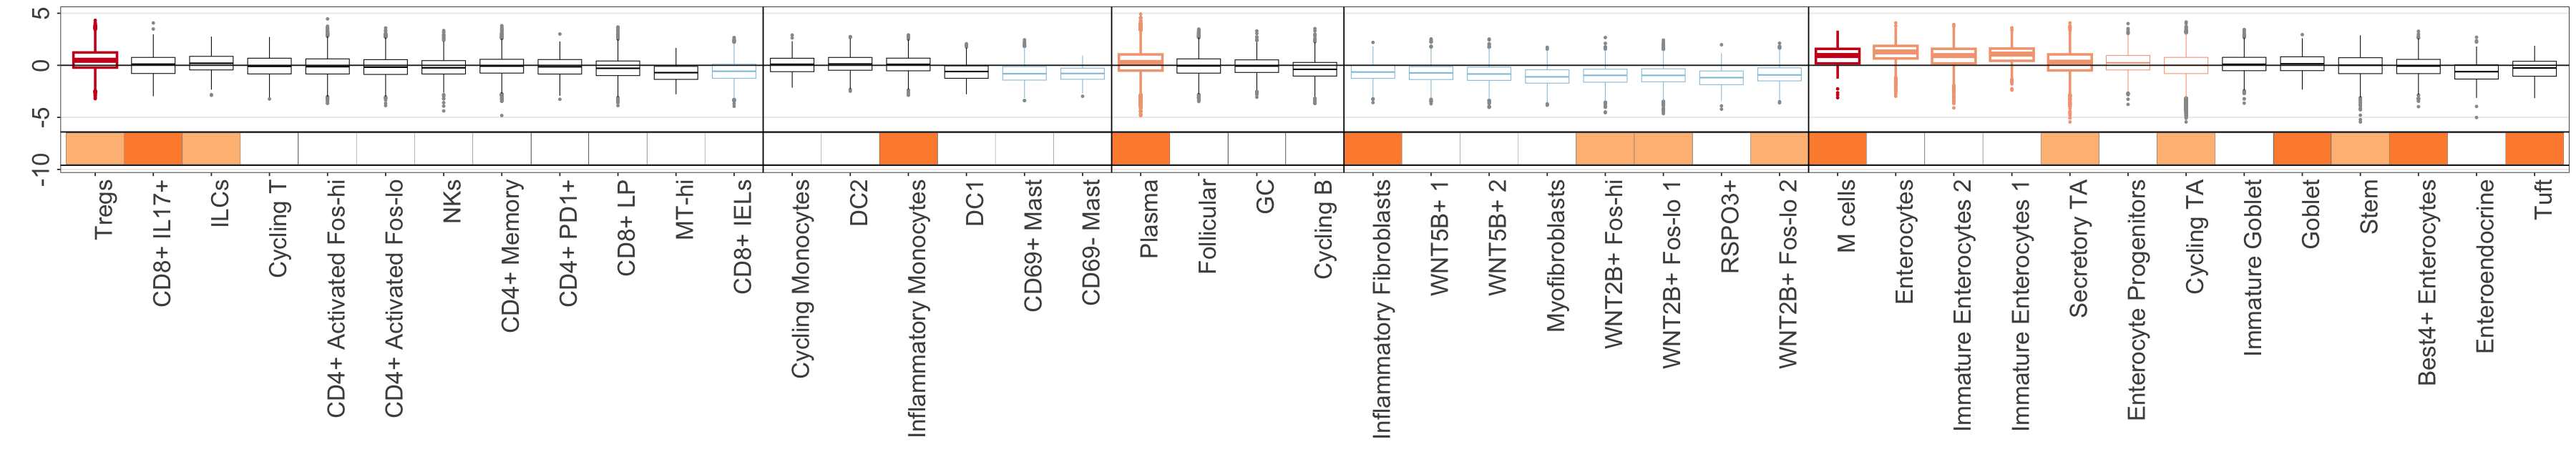

In [185]:
data2 = meta_data[meta_data$cluster %in% scdrs_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster %in% scdrs_sig_cell_clusters,]

 #[meta_data$pval < 0.1,]

p1 <- ggplot(meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore, color=cut(Z_score_micro, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.7) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.7) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey10") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +

new_scale("fill") +


geom_tile(aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=-8 , color="black", height=3, fill=factor(cluster, levels=rev(ranked_cell_clusters)))) +
scale_fill_manual(values=exp_colors_clean) + theme_bw(base_size=14) + 

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=12.5, color="black") + geom_vline(xintercept=18.5, color="black") + geom_vline(xintercept=22.5, color="black") + 
geom_vline(xintercept=30.5, color="black") +
geom_hline(yintercept=-9.6, color="black") + geom_hline(yintercept=-6.4, color="black") +

theme_bw() + 
theme( 
      axis.text.x = element_text(angle=90, size=20, hjust=1),legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 

options(repr.plot.height = 5.5, repr.plot.width =30 )
p1
# ggsave("./scDRS_UC_Label_full_LIMITED.pdf", height=5, width=22.5)
# save_plot("./scDRS_UC_Label_full_LIMITED.svg", fig = p1, width=22.5, height=5)

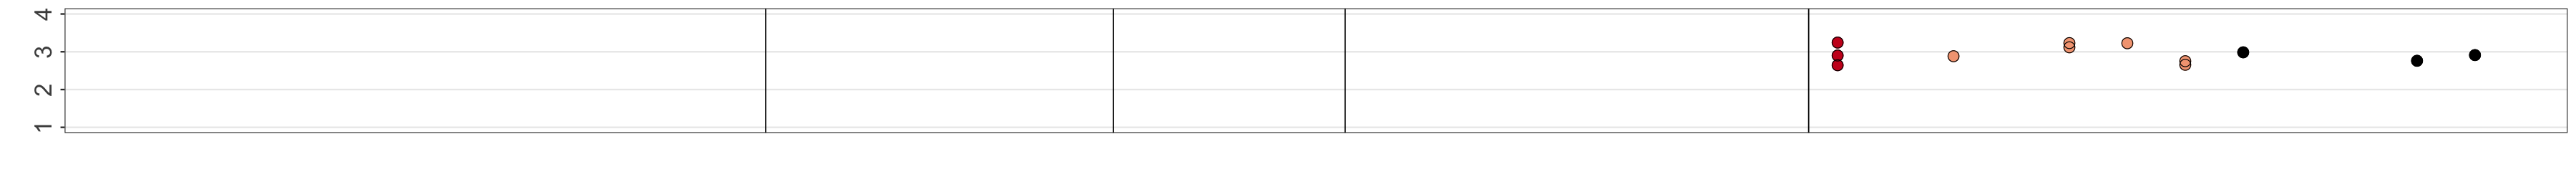

In [186]:
# SCGWAS

options(repr.plot.height = 2, repr.plot.width =30)
p_scgwas <- ggplot(scgwas_micro_graph, aes(x=factor(cell_type, levels=rev(ranked_cell_clusters)), 
                                           y=module_score_z, color=cut(Z_score, breaks = breaks_use))) +
geom_point(size=4) +  geom_point(shape = 1,size = 4,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(legend.position="None", 
     axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_color_manual(values = color_values,
                   limits = limits_use) +
  ylim(1, 4) + labs(x="", y="") +
scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=12.5, color="black") + geom_vline(xintercept=18.5, color="black") + geom_vline(xintercept=22.5, color="black") + 
geom_vline(xintercept=30.5, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(),legend.position="none", axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 

p_scgwas
# ggsave("./scGWAS_UC_TBE_Zscores_LIMITED.pdf", height=2, width=22.5)
# save_plot("./scGWAS_UC_Label_full_LIMITED.svg",  width=40, height=4,axis.textsize=0.5)

# ggsave("./scGWAS_UC_TBE_Zscores_LIMITED.pdf", height=2, width=22.5)
# save_plot("./scGWAS_UC_Label_full_LIMITED.svg",  width=40, height=4,axis.textsize=0.5)

[1] -3.702681

[1] 16.5342

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


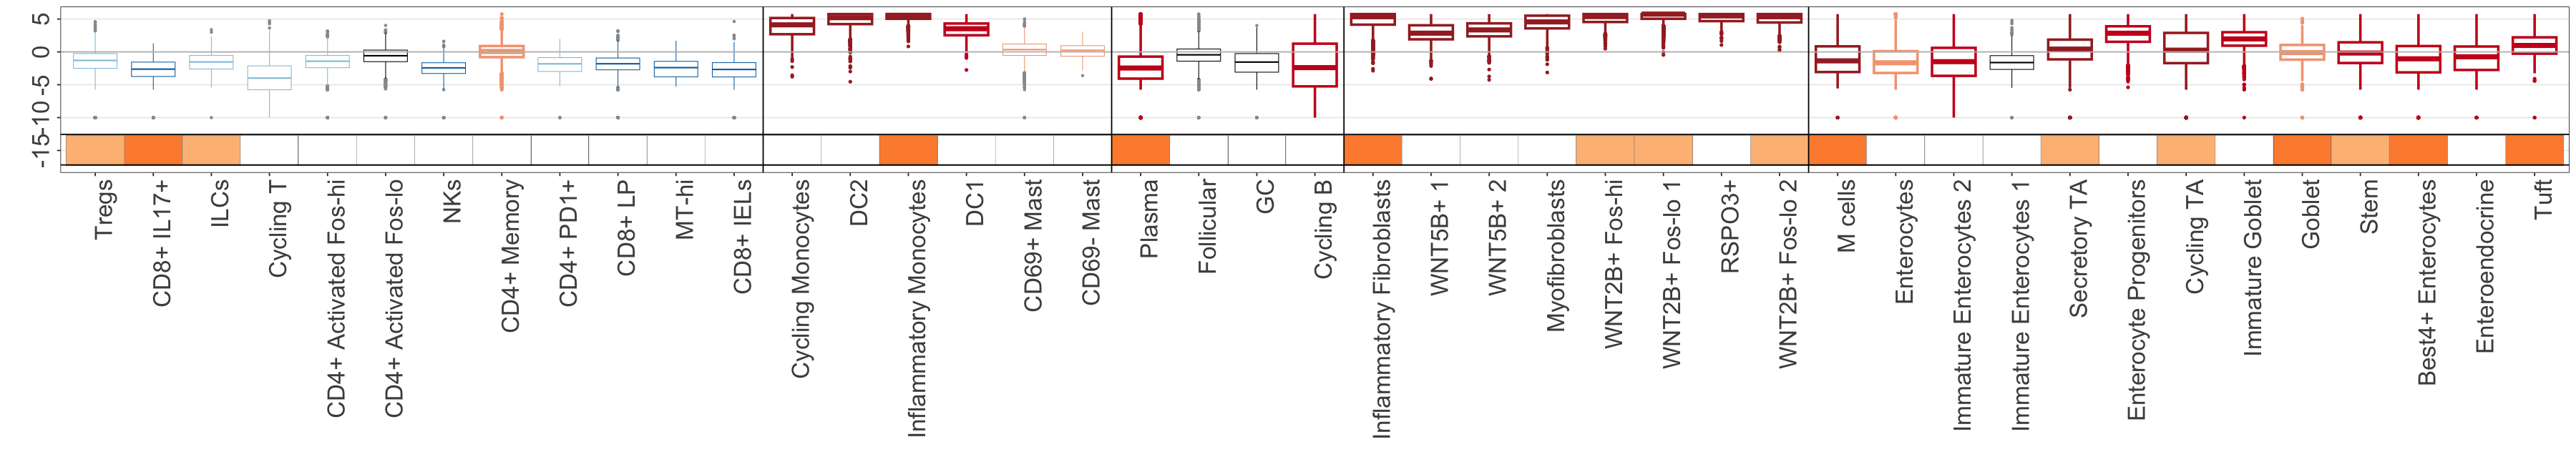

In [171]:
# SCDR SCP
min(meta_data$Z_score_micro_scp)
max(meta_data$Z_score_micro_scp)

data2 = meta_data[meta_data$cluster %in% scdrs_scp_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster %in% scdrs_scp_sig_cell_clusters,]
options(repr.plot.height = 2, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
p_scp <- ggplot(meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore_scp, color=cut(Z_score_micro_scp,, breaks = breaks_use))) +
geom_boxplot(data=data1, color="grey40", linewidth=0.3, outlier.colour = "grey60", outlier.size=0.7) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.7) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey10") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=12.5, color="black") + geom_vline(xintercept=18.5, color="black") + geom_vline(xintercept=22.5, color="black") + 
geom_vline(xintercept=30.5, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(),legend.position="none", axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 

data2 = meta_data[meta_data$cluster %in% scdrs_scp_norib_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster %in% scdrs_scp_norib_sig_cell_clusters,]
options(repr.plot.height = 2, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
p_scp_norib <- ggplot(meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=zscore_scp_norib, color=cut(Z_score_micro_scp_norib, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.6) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.8) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 

new_scale("fill") +

geom_tile(aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=-15 , color="black", height=4.5, fill=factor(cluster, levels=rev(ranked_cell_clusters)))) +
scale_fill_manual(values=exp_colors_clean) + theme_bw(base_size=14) + 

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=12.5, color="black") + geom_vline(xintercept=18.5, color="black") + geom_vline(xintercept=22.5, color="black") + 
geom_vline(xintercept=30.5, color="black") +
geom_hline(yintercept=-12.55, color="black") + geom_hline(yintercept=-17.2, color="black") +
theme_bw() + 
theme( 
      axis.text.x = element_text(angle=90, size=20, hjust=1),legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 



options(repr.plot.height=5.5, repr.plot.width=30)
p_scp_norib

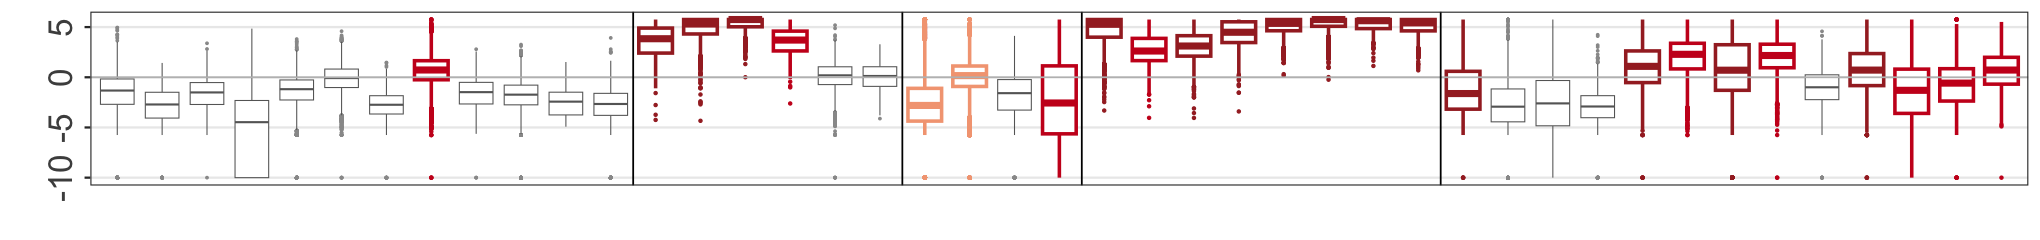

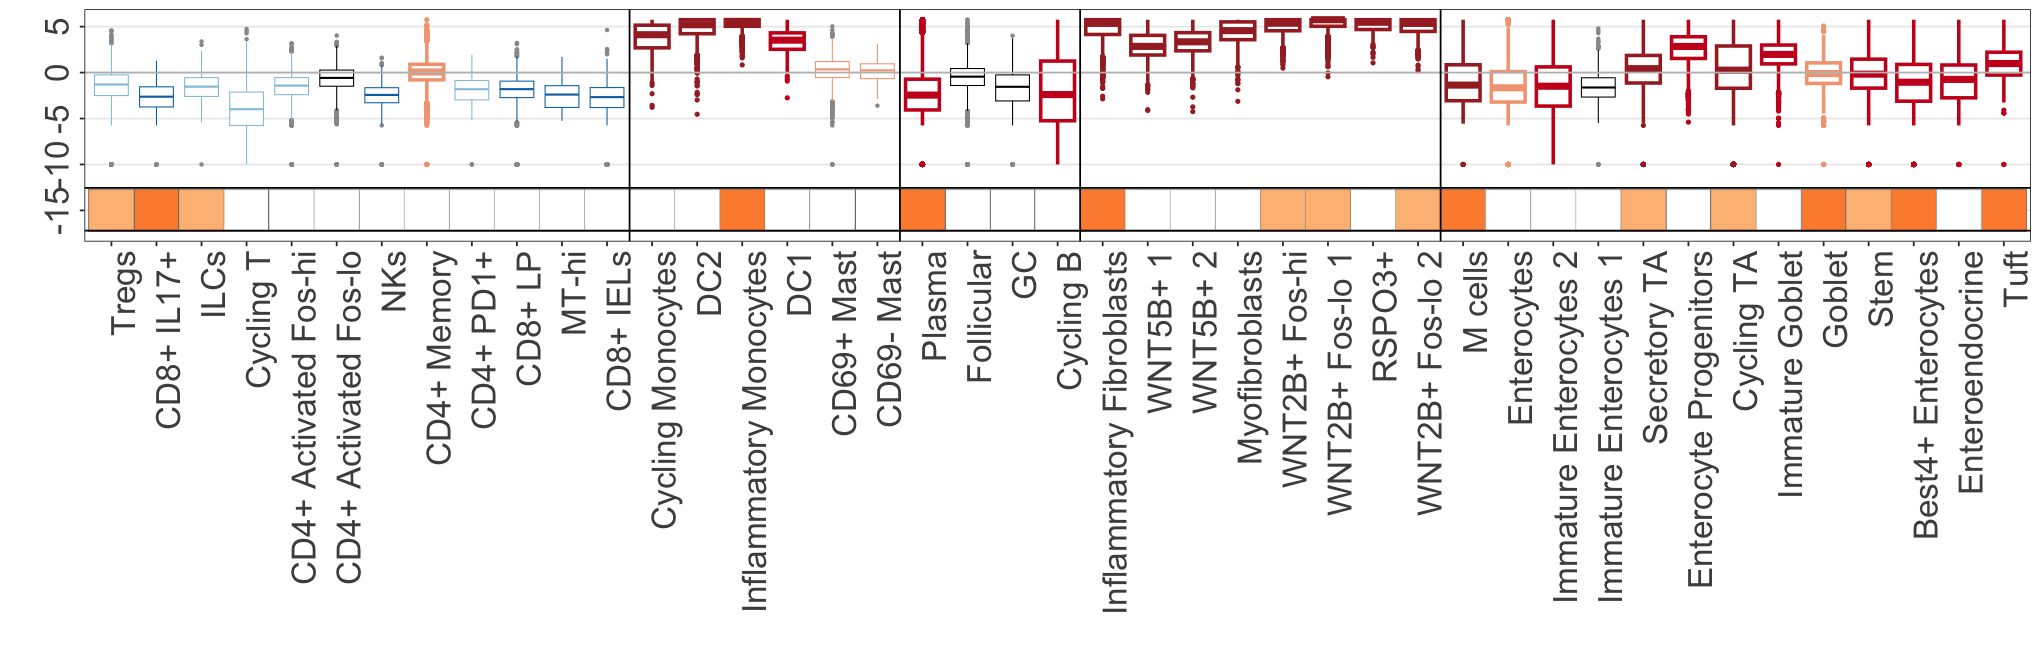

In [196]:
options(repr.plot.height=2, repr.plot.width=17)
p_scp
ggsave("./scDRS_scp_RA_full_LIMITED.png", width=17, height=2, dpi=300)
options(repr.plot.height=5.5, repr.plot.width=17)
p_scp_norib# 46 sig calls
save_plot("./scDRS_scpnorib_RA_full_LIMITED.svg", p_scp_norib, base_width=17, base_height=5.5)

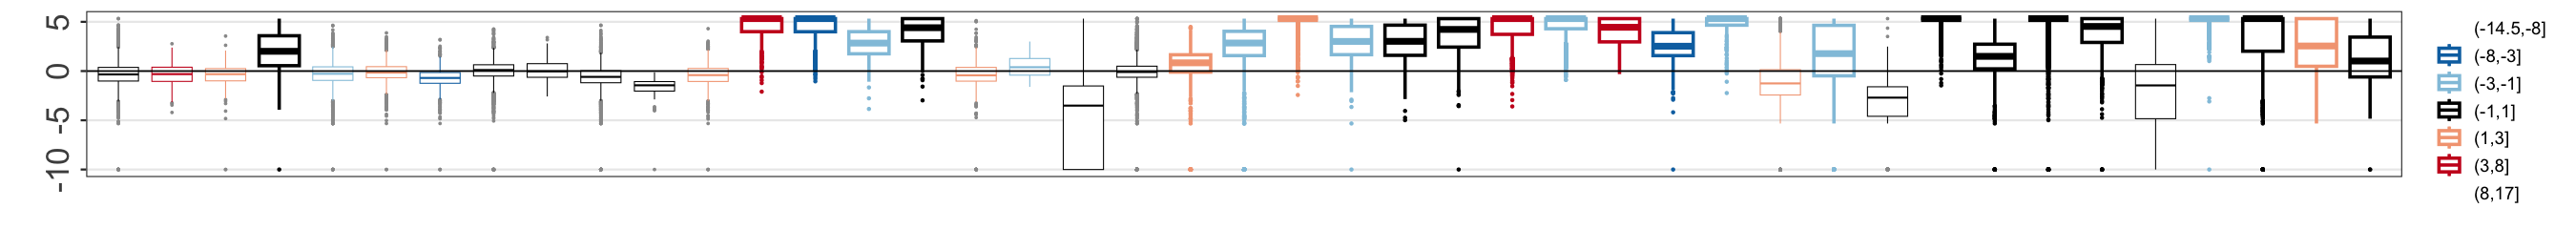

In [187]:
# SCPAGWAS


data2 = meta_data[meta_data$cluster %in% scpgwas_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster %in% scpgwas_sig_cell_clusters,]
options(repr.plot.height = 2, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
p_scpagwas <- ggplot(meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=Random_Correct_BG_z, color=cut(bt_score, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.7) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.7) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey10") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +


scale_x_discrete(limits=rev(ranked_cell_clusters)) + 

geom_vline(xintercept=12.5, color="black") + geom_vline(xintercept=18.5, color="black") + geom_vline(xintercept=22.5, color="black") + 
geom_vline(xintercept=30.5, color="black") +
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(),legend.position="none", axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


# plot to get legend
ggplot(meta_data, aes(x=factor(cluster, levels=rev(ranked_cell_clusters)), y=Random_Correct_BG_z, color=cut(bt_score, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.4) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.6) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +


scale_x_discrete(limits=rev(ranked_cell_clusters)) + 
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(), axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


In [120]:
options(warn=-1)

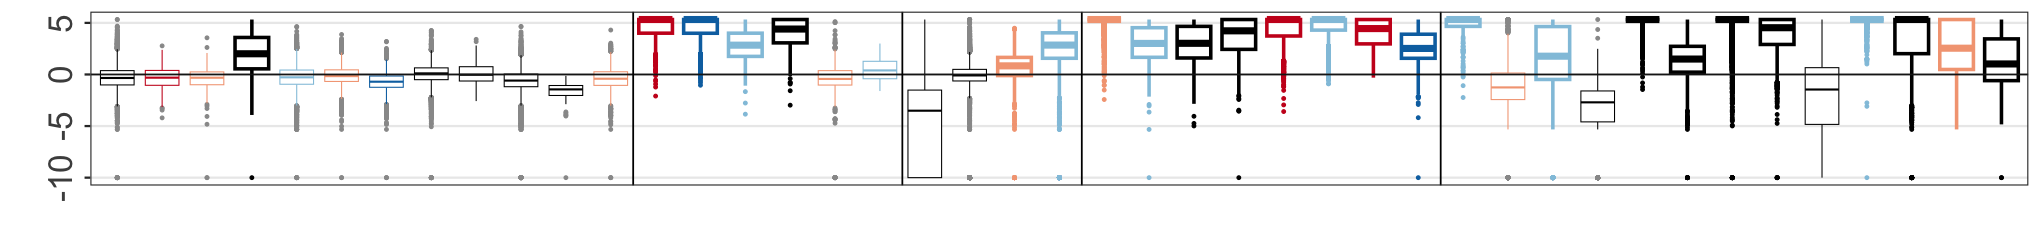

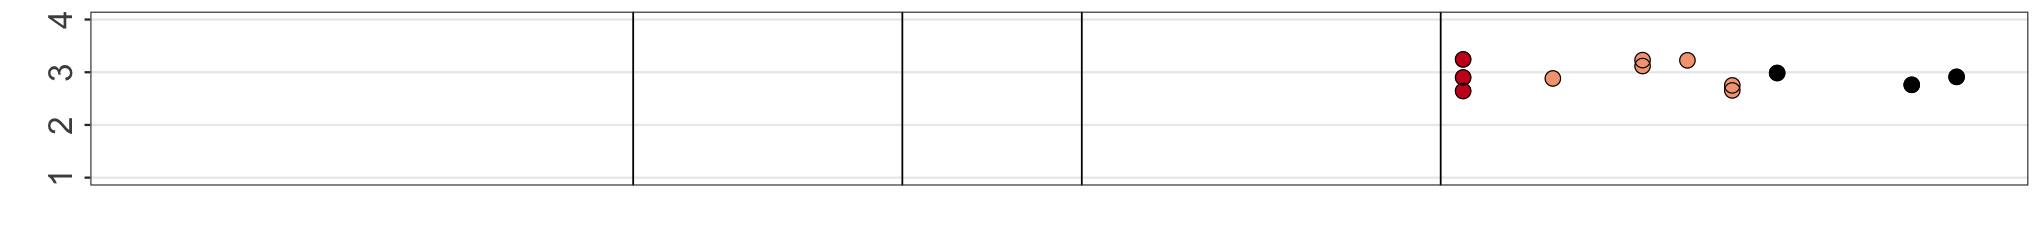

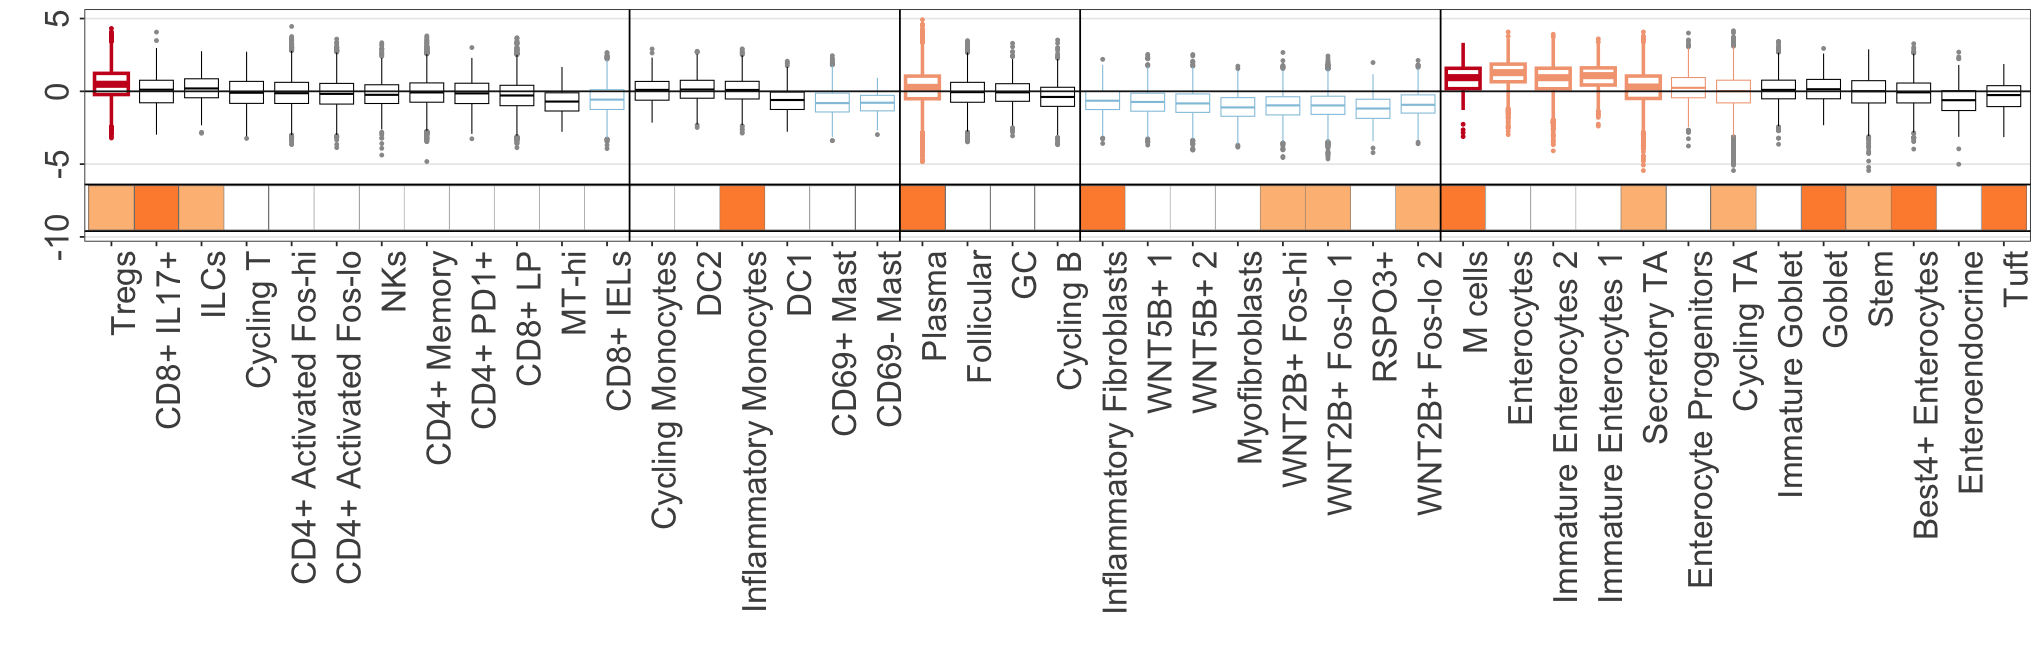

In [194]:
options(repr.plot.height=2, repr.plot.width=17)
p_scpagwas #43 sig calls
ggsave("./scPagwas_UC_full_LIMITED.png", dpi=300, width=17, height=2)
# save_plot("./scPagwas_RA_full_LIMITED.png", p_scpagwas, base_width=30, base_height=2)

p_scgwas # 36 sig calls
ggsave("./scGWAS_UC_full_LIMITED.png", dpi=300, width=17, height=2)
# save_plot("./scGWAS_RA_full_LIMITED.svg", p_scgwas, base_width=30, base_height=2)
options(repr.plot.height = 5.5, repr.plot.width =17 )
p1
save_plot("./scDRS_UC_Label_full_LIMITED.svg", p1, base_width=17, base_height=5.5)